## 1. Projects Overview
Data ini berisi transaksi pengguna kartu kredit sebanyak 9000 orang selama 6 bulan. Data ini memiliki 18 atribut.
### Dataset "Dataset CC GENERAL"

## Attribute Information:
1. CUSTID - Identifikasi pemegang Kartu Kredit (Kategorikal)
2. BALANCE - Jumlah saldo yang tersisa di akun mereka untuk melakukan pembelian 
3. BALANCEFREQUENCY - Seberapa sering Saldo diperbarui, nilai antara 0
dan 1 (1 = sering diperbarui, 0 = tidak sering diperbarui)
4. PURCHASES - Jumlah pembelian yang dilakukan dari akun
5. ONEOFFPURCHASES - Jumlah pembelian maksimum yang dilakukan dalam sekali transaksi
6. INSTALLMENTSPURCHASES - Jumlah pembelian yang dilakukan secara cicilan
7. CASHADVANCE - Uang tunai di muka yang diberikan oleh pengguna
8. PURCHASESFREQUENCY - Seberapa sering Pembelian dilakukan, beri skor
antara 0 dan 1 (1 = sering dibeli, 0 = tidak sering dibeli)
9. ONEOFFPURCHASESFREQUENCY - Seberapa sering Pembelian dilakukan dalam
sekali belanja (1 = sering dibeli, 0 = tidak sering dibeli)
10. PURCHASESINSTALLMENTSFREQUENCY - Seberapa sering pembelian secara
cicilan yang dilakukan (1 = sering dilakukan, 0 = tidak sering dilakukan)
11. CASHADVANCEFREQUENCY - Seberapa sering pembayaran uang muka dilakukan
12. CASHADVANCETRX - Jumlah Transaksi yang dilakukan dengan "Uang Muka"
13. PURCHASESTRX - Jumlah transaksi pembelian yang dilakukan
14. CREDITLIMIT - Batas Kartu Kredit untuk pengguna
15. PAYMENTS - Jumlah Pembayaran yang dilakukan oleh pengguna
16. MINIMUM_PAYMENTS - Jumlah minimum pembayaran yang dilakukan oleh pengguna
17. PRCFULLPAYMENT - Persentase pembayaran penuh yang dibayarkan oleh pengguna
18. TENURE - Jangka waktu layanan kartu kredit untuk pengguna

# 2. Import Library

1. **Import Library:**
   - `numpy` dan `pandas` untuk manipulasi data.
   - `warnings` untuk menyembunyikan warning.
   - `seaborn` dan `matplotlib.pyplot` untuk visualisasi data.

2. **Set Option:**
   - `pd.set_option("display.max.columns", None)`: Mengatur opsi pandas agar semua kolom dapat ditampilkan.

3. **Import Model untuk Klasifikasi:**
   - `RandomForestClassifier`  dari sklearnlearn untuk digunakan pada masalah klasifikasi.

4. **Split Dataset dan Standarisasi:**
   - `Winsorizer` dari Feature-Engine untuk mengatasi outlier.
   - `LabelEncoder` untuk mengkodekan variabel kategorikal.
   - `RobustScaler` untuk standarisasi data yang tahan terhadap outlier.
   - `train_test_split` dari scikit-learn untuk membagi dataset menjadi training dan testing sets.

5. **Evaluasi Model:**
   - `accuracy_score`, `classification_report`, dan `confusion_matrix` dari scikit-learn untuk mengevaluasi performa model klasifikasi.


In [152]:
import numpy as np
import pandas as pd 
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

from scipy import stats

warnings.filterwarnings("ignore")

pd.set_option("display.max.columns", None)

# For Classification Problems
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Impor pustaka yang diperlukan
from scipy.stats import gaussian_kde

# Split Dataset and Standarize the Datasets
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Evaluate  Models
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report, confusion_matrix

# 3. Data Loading

1. Data Loading:
   - The code snippet is responsible for loading a dataset from a CSV file.
   - `pd.read_csv('CC GENERAL')` reads the CSV file located in the '../Dataset' directory and stores it as a DataFrame named 'df'. This is done using the pandas library.

2. Dataset Shape:
   - `df.shape` is used to retrieve and display the dimensions of the dataset. It returns a tuple of (number of rows, number of columns) in the DataFrame 'df'.

3. Dataset Information:
   - `df.info()` is employed to obtain a summary of the dataset's information, including the data types of each column, the number of non-null entries, and memory usage. This provides an overview of the dataset's structure.

4. Descriptive Statistics:
   - `df.describe()` generates basic descriptive statistics for the numerical columns in the dataset. It includes count, mean, standard deviation, minimum, quartiles, and maximum values for each numeric column. This helps in understanding the distribution and characteristics of the data.

This code is the initial step in the data analysis process, where the dataset is loaded, and basic information about its shape, data types, and summary statistics is displayed. Further analysis and data processing can be performed based on this initial exploration.


In [153]:
df = pd.read_csv('../../Dataset/CC GENERAL.csv')
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

## 4. DATA CLEANING

In [155]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [156]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [157]:
def impute_random_sample(df, CC_GENERAL):
    for column in CC_GENERAL:
        # Menentukan indeks data yang memiliki nilai NaN pada kolom tertentu
        nan_indices = df[df[column].isna()].index
        
        # Mengambil sample secara acak dari kolom tersebut
        random_sample = df[column].dropna().sample(len(nan_indices), replace=True)
        
        # Mengisi nilai NaN dengan sample secara acak
        df.loc[nan_indices, column] = random_sample.values

    return df

In [158]:
CC_GENERAL = ['CREDIT_LIMIT','MINIMUM_PAYMENTS']

In [159]:
df = impute_random_sample(df, CC_GENERAL)

In [160]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [161]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,126.386467,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [162]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [163]:
df.drop('CUST_ID', axis=1, inplace=True)

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [165]:
df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [166]:
# Memilih kolom numerik yang bukan bertipe objek
num_cols = df.select_dtypes(exclude='object').columns


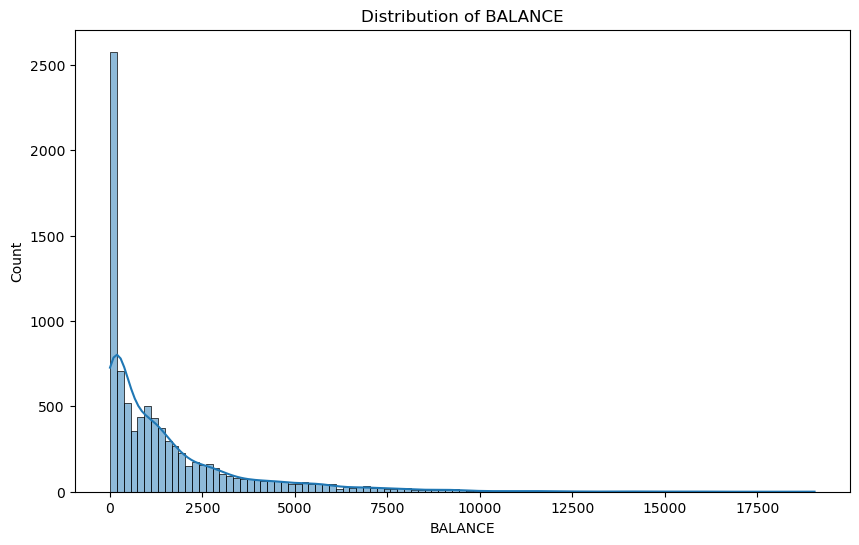

Skewness of BALANCE: 2.393386042571806


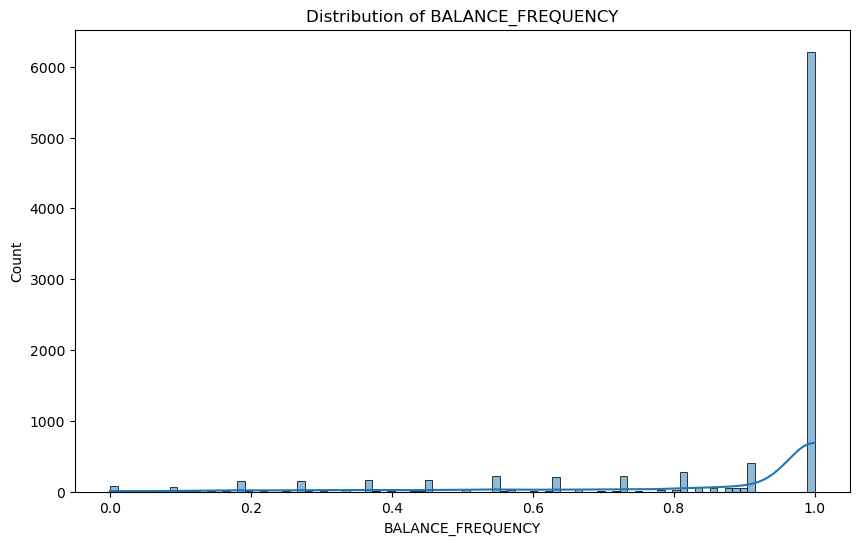

Skewness of BALANCE_FREQUENCY: -2.0232655185149078


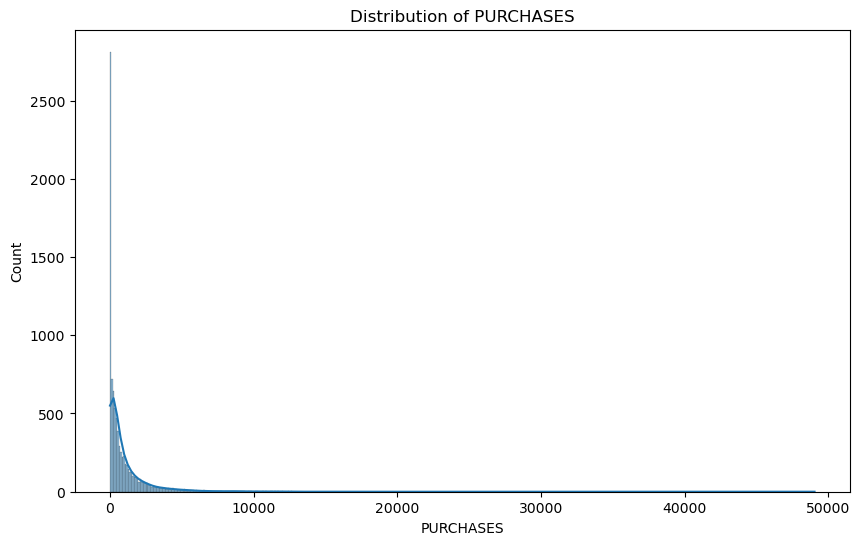

Skewness of PURCHASES: 8.144269064554651


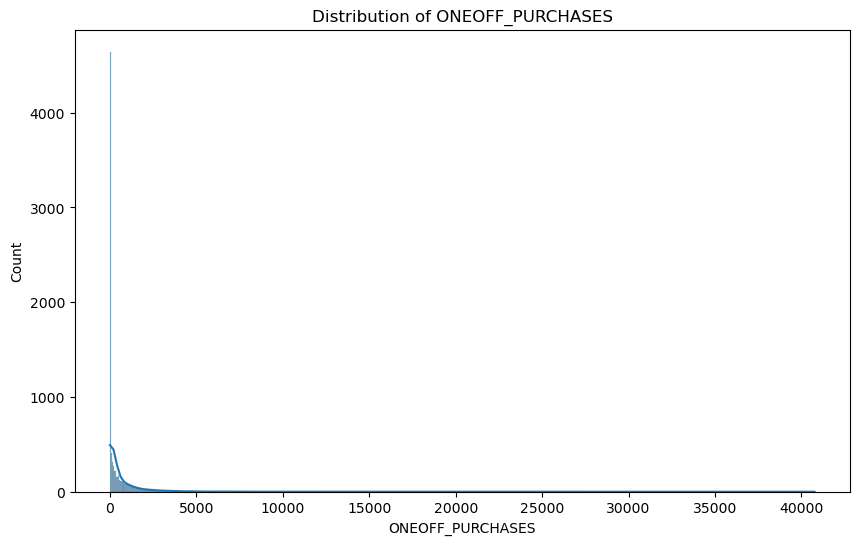

Skewness of ONEOFF_PURCHASES: 10.045082884700278


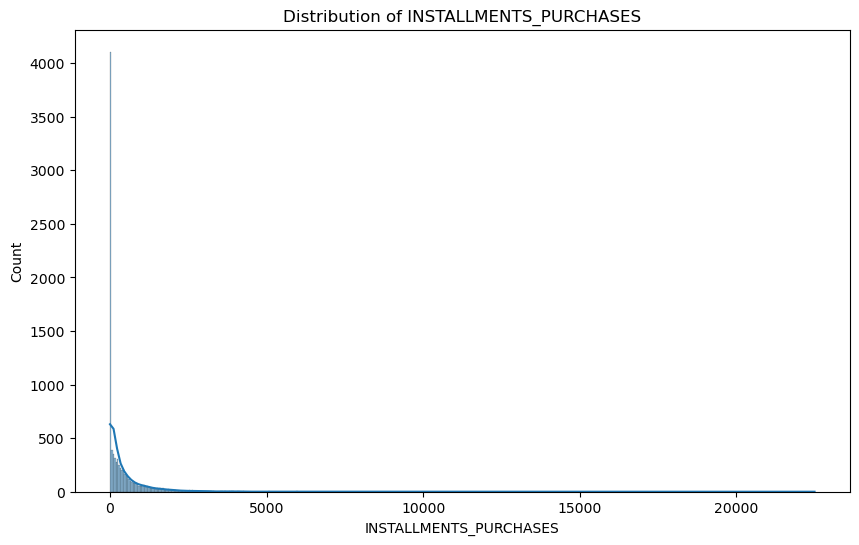

Skewness of INSTALLMENTS_PURCHASES: 7.299119908745641


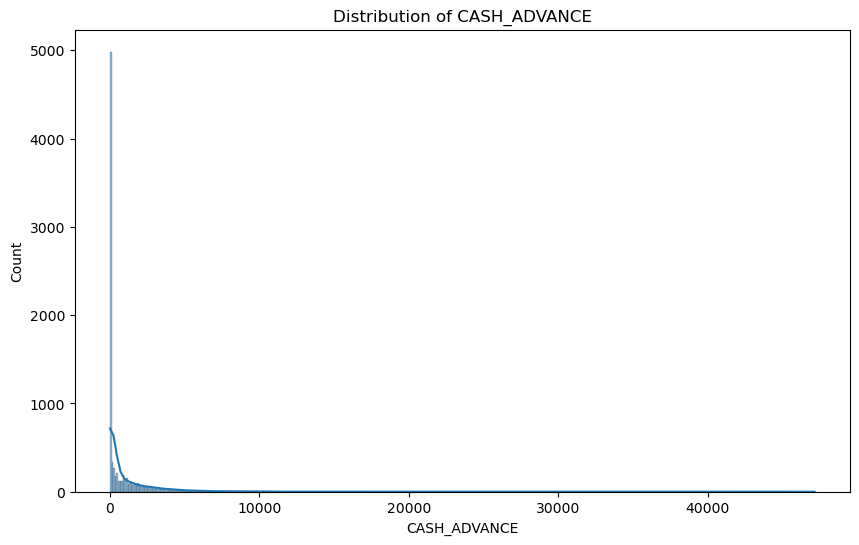

Skewness of CASH_ADVANCE: 5.166609074074723


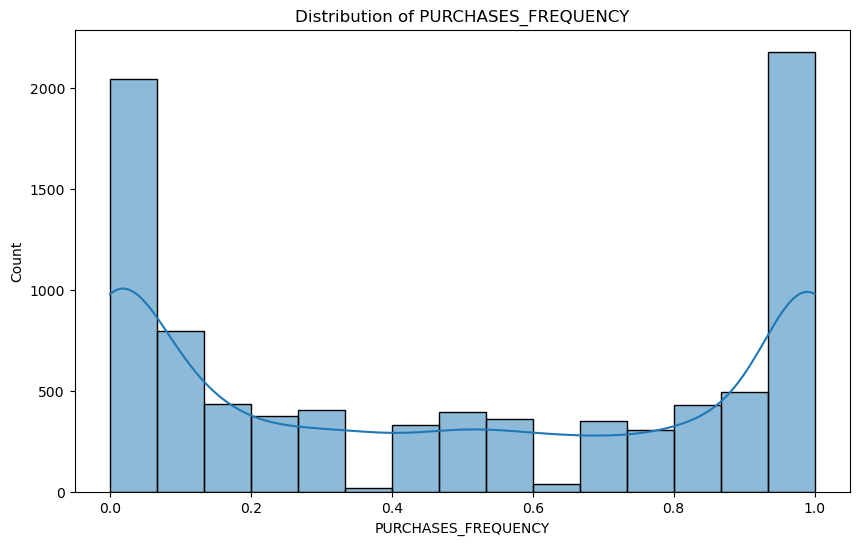

Skewness of PURCHASES_FREQUENCY: 0.06016423585803591


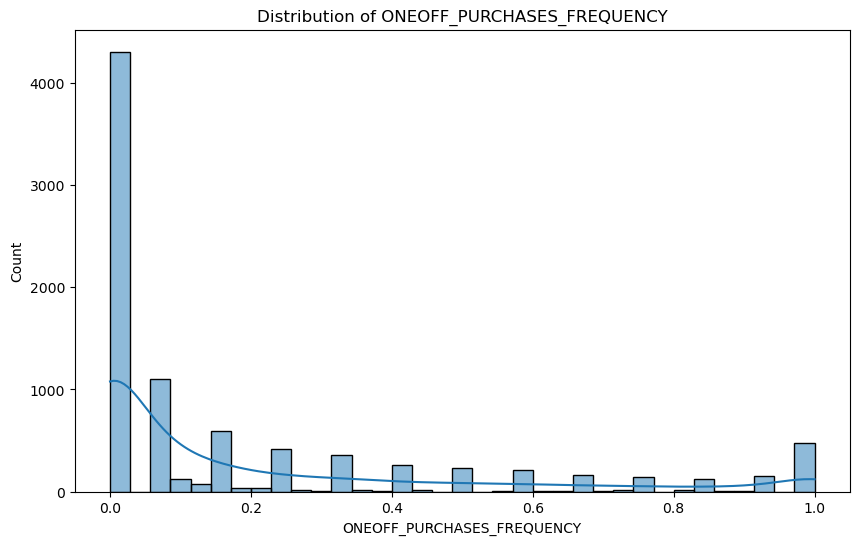

Skewness of ONEOFF_PURCHASES_FREQUENCY: 1.5356127835248519


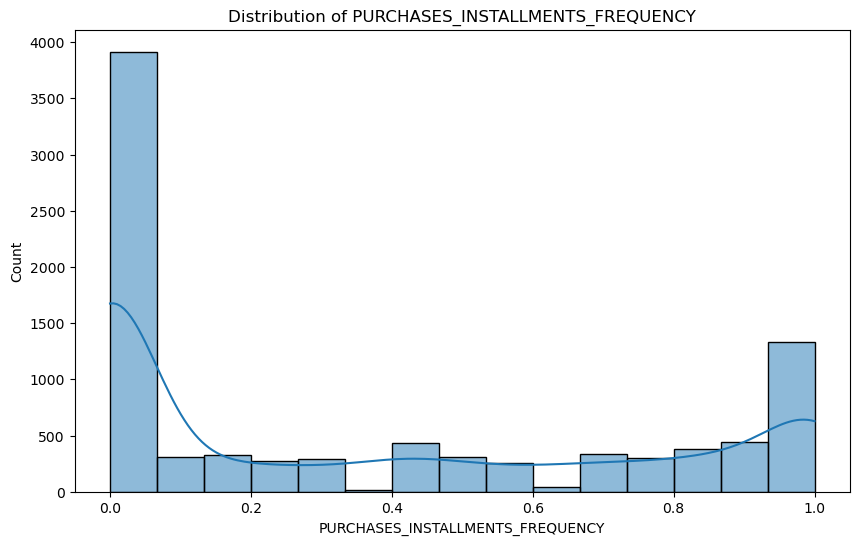

Skewness of PURCHASES_INSTALLMENTS_FREQUENCY: 0.5092011649999882


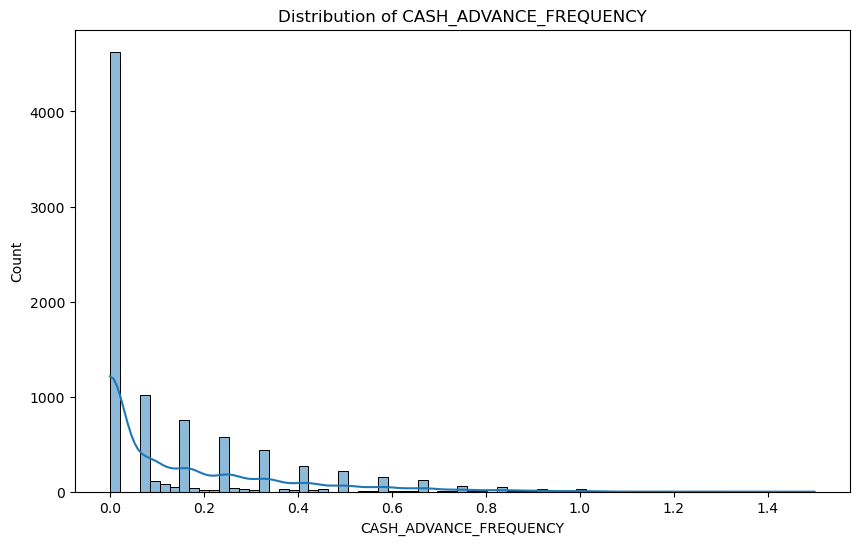

Skewness of CASH_ADVANCE_FREQUENCY: 1.828686266477852


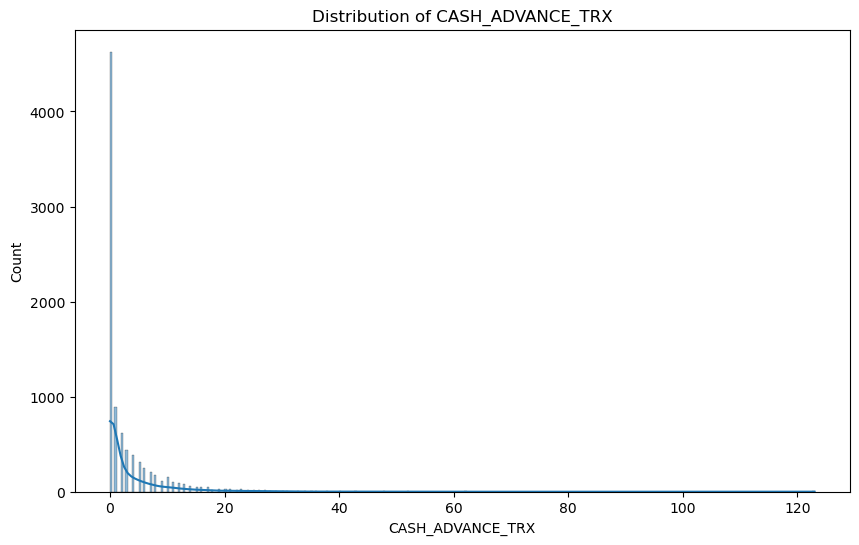

Skewness of CASH_ADVANCE_TRX: 5.721298203192298


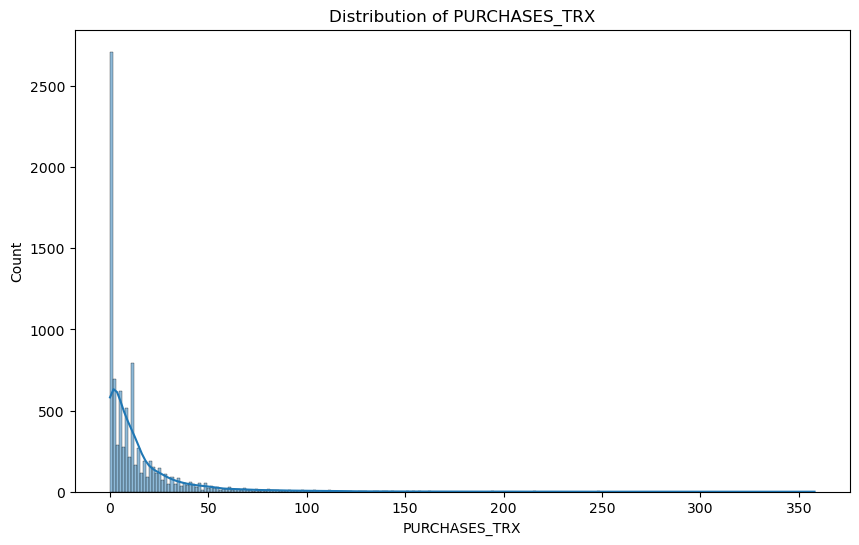

Skewness of PURCHASES_TRX: 4.630655265932403


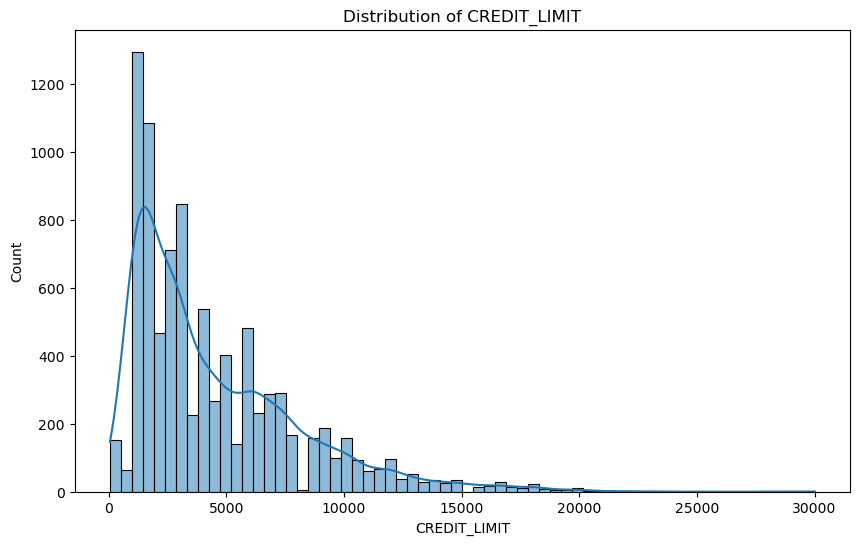

Skewness of CREDIT_LIMIT: 1.5226193263625962


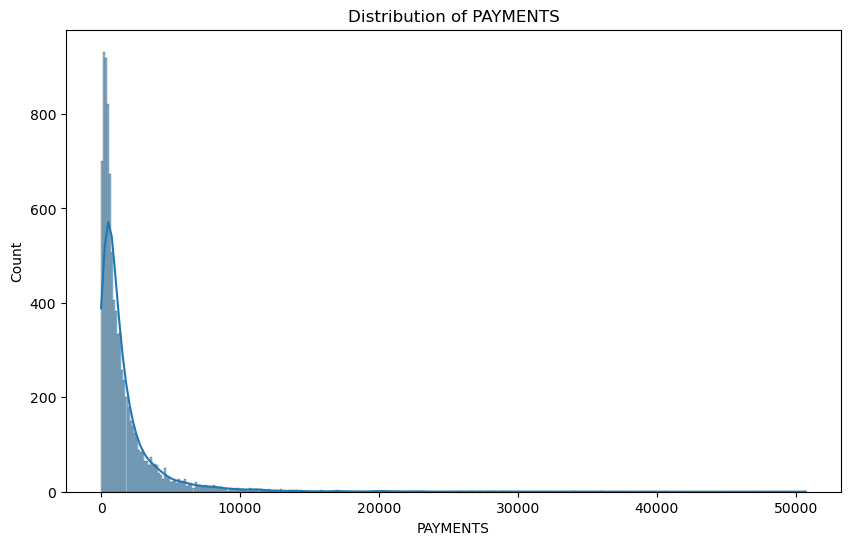

Skewness of PAYMENTS: 5.907619794397562


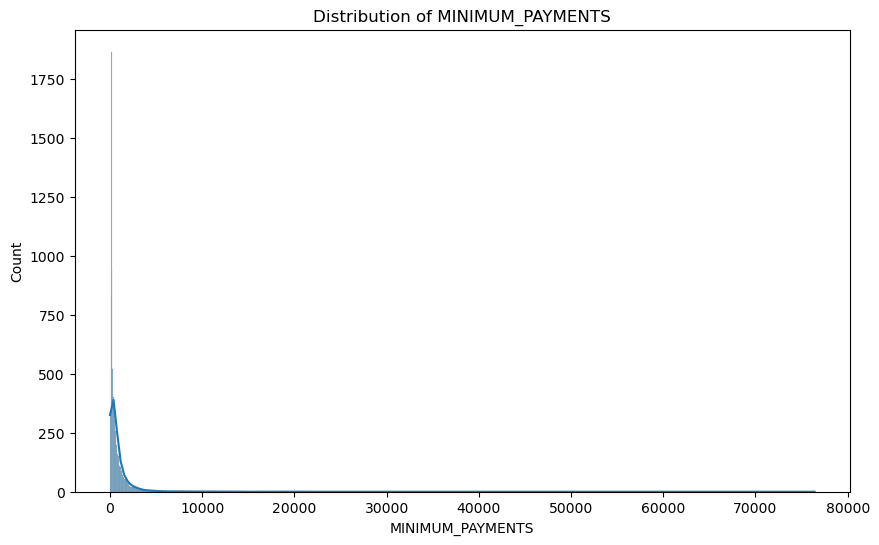

Skewness of MINIMUM_PAYMENTS: 13.184643968226238


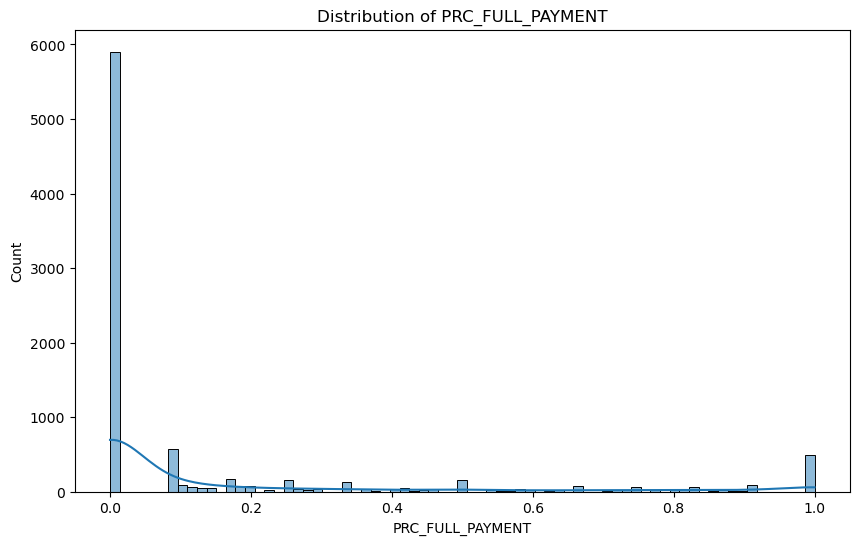

Skewness of PRC_FULL_PAYMENT: 1.942819940971858


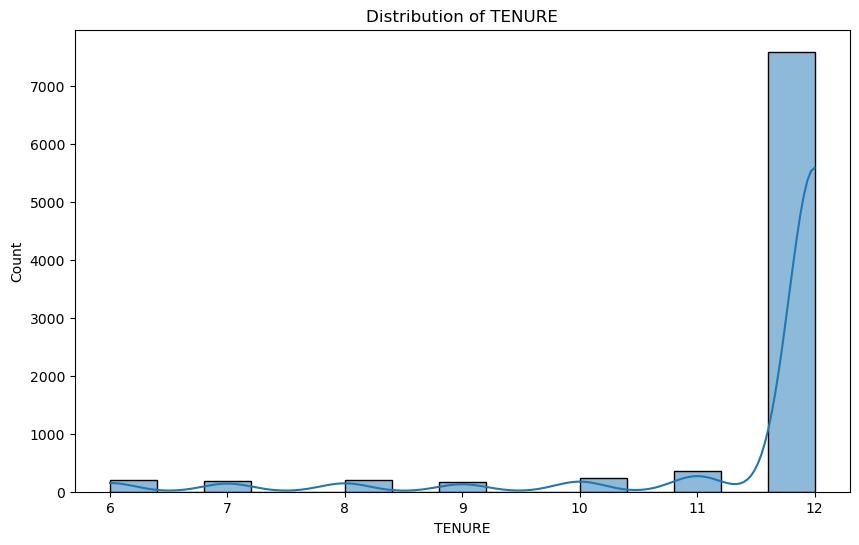

Skewness of TENURE: -2.9430172876199134


In [167]:
# Menghitung skewness dan membuat diagram distribusi
for col in num_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')

    plt.show()

    skewness = df[col].skew()
    print(f'Skewness of {col}: {skewness}')

    plt.show()

**NOTE:** <br>
Kolom yang memiliki distribusi Normal : 'BALANCE_FREQUENCY', 'INSTALLMENTS_PURCHASES', 'PURCHASES_FREQUENCY','ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE' <br><br>
Kolom yang memiliki distribusi skewed : 'PURCHASES', 'ONEOFF_PURCHASES' <br> <br>

### Handling NaN Value
- Kolom dengan jenis object akan di imputasi dengan `mode`
- Kolom yang memiliki distribusi `Normal` akan di imputasi dengan `Mean`
- Kolom yang memiliki distribusi `Skewed` akan di imputasi dengan `Median`
- Khusus untuk kolom `CASH_ADVANCE` dan `CASH_ADVANCE_FREQUENCY` akan di imputasi dengan `Random sample`

In [168]:
random_row = df.sample()
print("Data acak dari dataset:")
print(random_row)

Data acak dari dataset:
         BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
3475  933.622145                1.0    2873.87           1756.23   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
3475                 1117.64    342.602229                  1.0   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
3475                    0.333333                               1.0   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
3475                0.166667                 2             32        7000.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
3475  2361.792954        360.663949          0.083333      12  


In [169]:
df['CREDIT_LIMIT'].value_counts().sort_index()

50.0        1
150.0       5
200.0       3
300.0      14
400.0       3
           ..
22500.0     1
23000.0     2
25000.0     1
28000.0     1
30000.0     2
Name: CREDIT_LIMIT, Length: 205, dtype: int64

In [170]:
# Membuat fungsi untuk imputasi kolom object
def impute_object_columns(df):
    # Memilih kolom-kolom bertipe objek
    object_columns = df.select_dtypes(include='object').columns
    
    # Loop melalui kolom-kolom tersebut dan mengimpute dengan modus
    for column in object_columns:
        mode_value = df[column].mode().iloc[0]  # Mengambil nilai modus
        df[column].fillna(mode_value, inplace=True)  # Mengimpute nilai kosong dengan modus
    
    return df

In [171]:
# Penggunaan fungsi untuk imputasi kolom objek
df = impute_object_columns(df)

In [172]:
# Menampilkan jumlah nilai NaN setelah imputasi kolom objek
df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [173]:
numeric_columns_normal = [col for col in num_cols if col not in ['BALANCE','CASH_ADVANCE','CASH_ADVANCE_FREQUENCY','CREDIT_LIMIT','MINUMUM_PAYMENTS']]
numeric_columns_skewed = num_cols[2:4]

In [174]:
print(num_cols)
print(numeric_columns_normal)
print(numeric_columns_skewed)

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')
['BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']
Index(['PURCHASES', 'ONEOFF_PURCHASES'], dtype='object')


In [175]:
# Membuat fungsi untuk imputasi kolom numerik dengan mean (normal) dan median (skewed)
def impute_numeric_columns(df, normal_columns, skewed_columns):
    # Imputasi kolom dengan distribusi normal menggunakan mean
    for column in normal_columns:
        mean_value = df[column].mean()
        df[column].fillna(mean_value, inplace=True)

    # Imputasi kolom dengan distribusi skewed menggunakan median
    for column in skewed_columns:
        median_value = df[column].median()
        df[column].fillna(median_value, inplace=True)

    return df

In [176]:
# Penggunaan fungsi untuk imputasi kolom numerik
df = impute_numeric_columns(df, numeric_columns_normal, numeric_columns_skewed)

In [177]:
# Menampilkan jumlah nilai NaN setelah imputasi kolom numerik
df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [178]:
# Menslicing kolom credit
credit_columns = ['CREDIT_LIMIT']

In [179]:
# Penggunaan fungsi untuk imputasi kolom dengan nilai acak
df = impute_random_sample(df, credit_columns)

In [180]:
# Menampilkan jumlah nilai NaN setelah imputasi kolom dengan nilai acak
df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [181]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,126.386467,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [182]:
#The `plot_corr` function is used to create a correlation matrix heatmap plot for a given DataFrame, 
#visualizing the pairwise correlations between numeric columns within the dataset. 
#It provides a quick and intuitive way to assess the relationships between variables in the data.
def plot_corr(df, size=16):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size,size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)

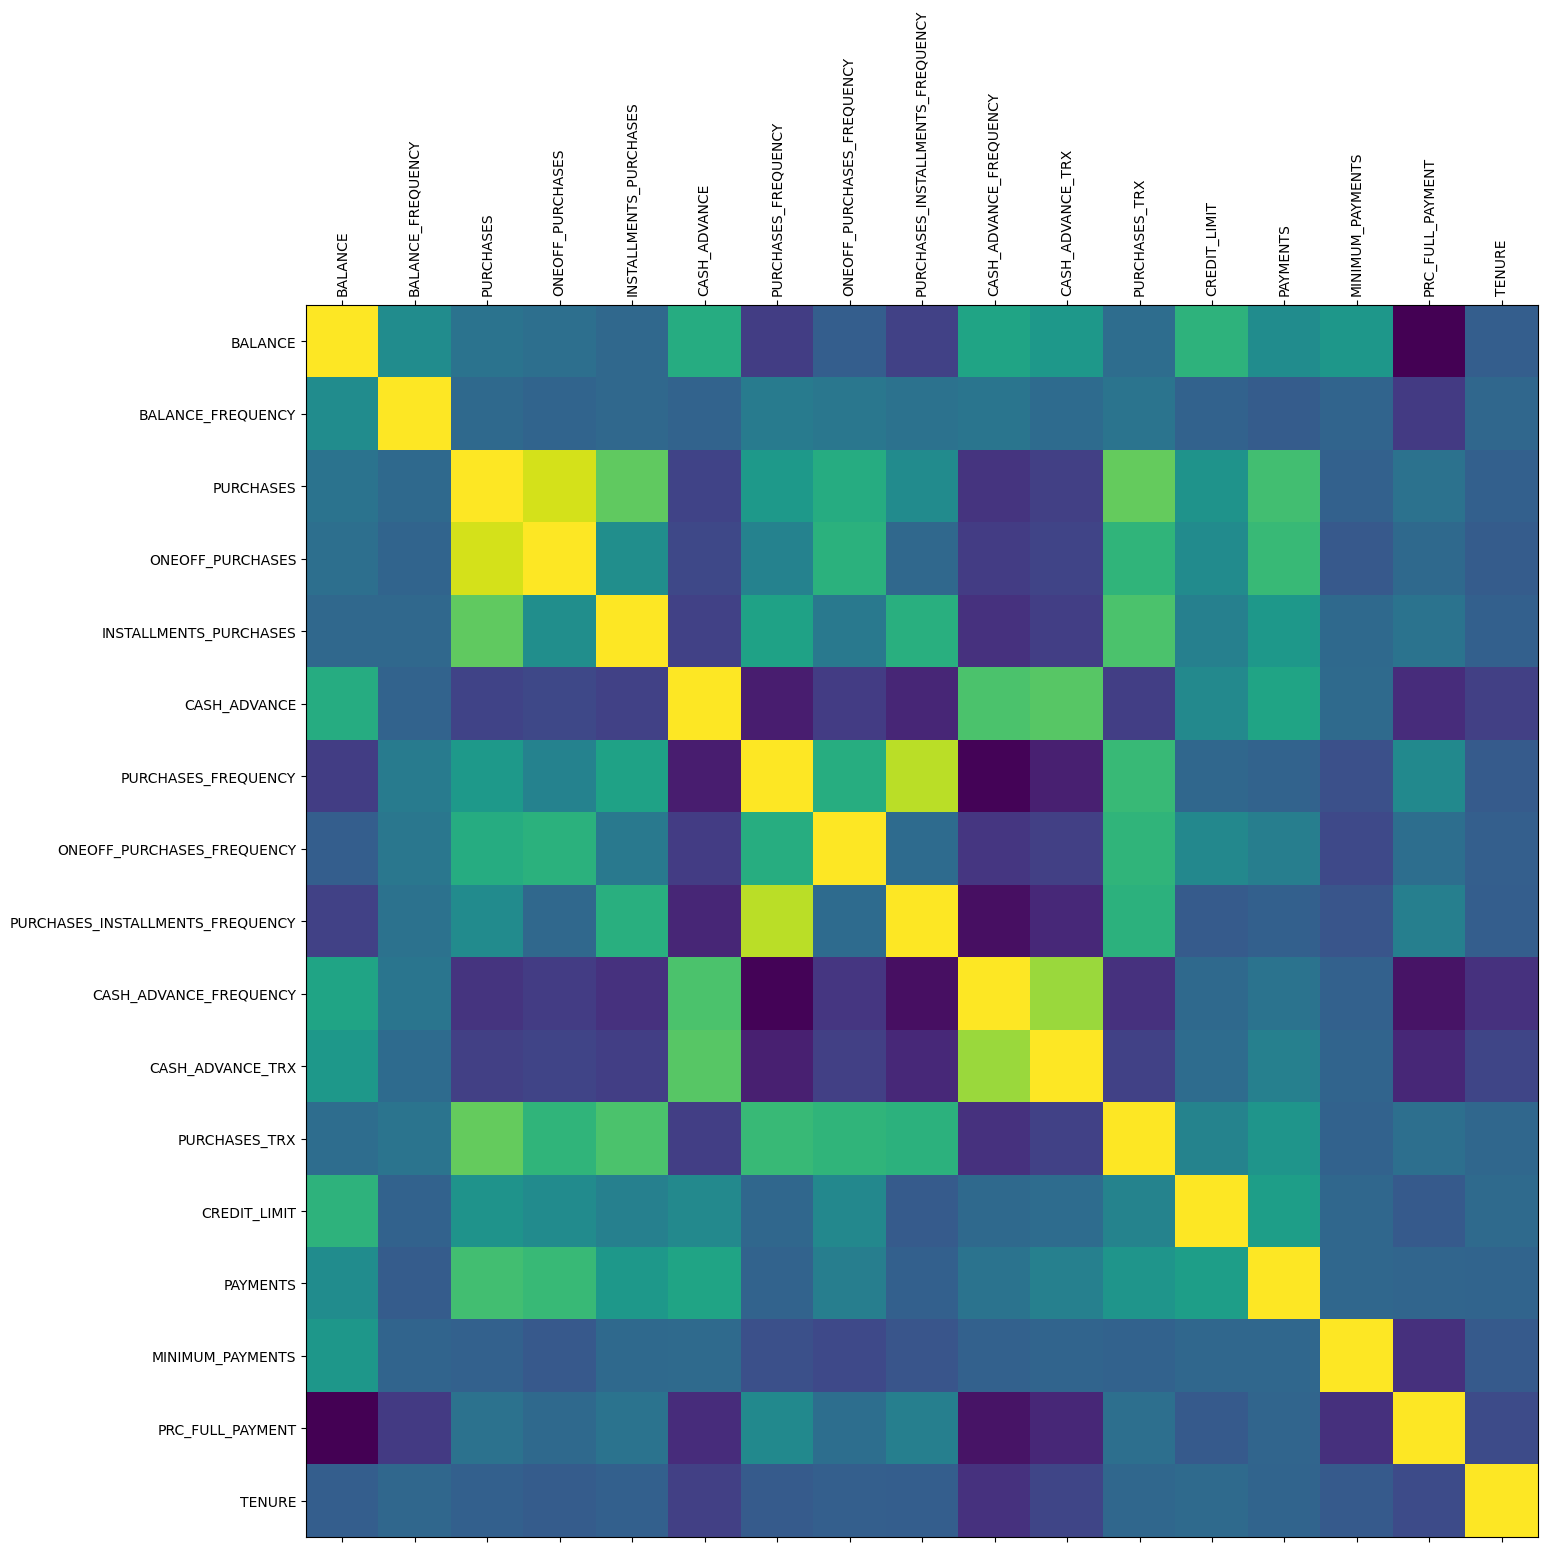

In [183]:
plot_corr(df)

In [184]:
len(df['BALANCE'].value_counts())

8871

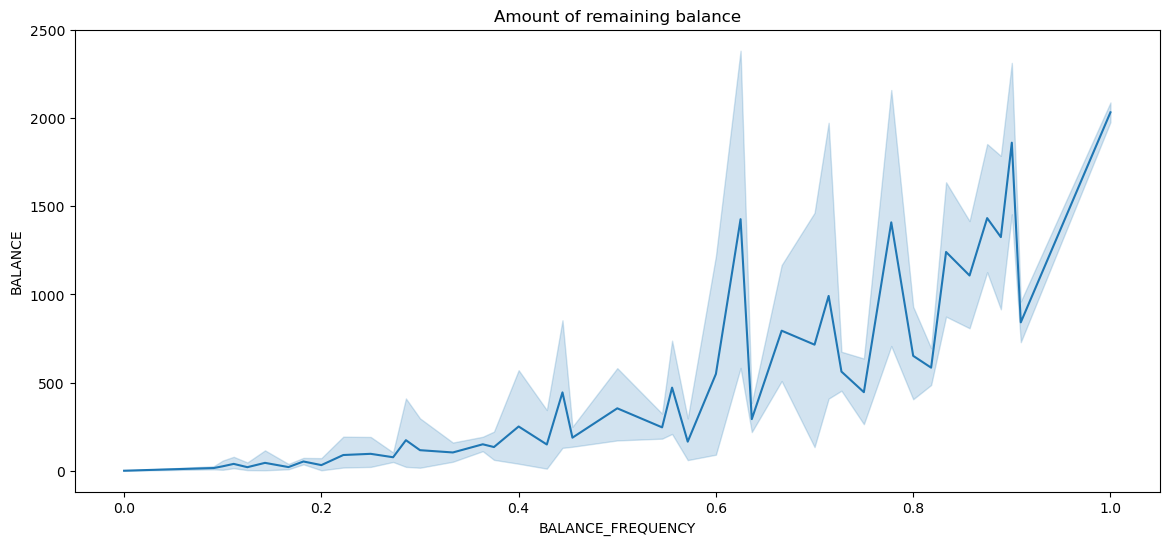

In [185]:
# Mengatur ukuran plot
plt.figure(figsize=(14, 6))

# Menggunakan line plot
sns.lineplot(x='BALANCE_FREQUENCY', y='BALANCE', data=df)

# Menambahkan label dan judul
plt.title('Amount of remaining balance')
plt.xlabel('BALANCE_FREQUENCY')
plt.ylabel('BALANCE')

# Menampilkan plot
plt.show()

membuat plot yang menunjukkan hubungan antara 'BALANCE_FREQUENCY' (frekuensi pembayaran saldo) dan 'BALANCE' (saldo) dengan menggunakan line plot. 

In [186]:
X = df[['BALANCE']]
y = df['PURCHASES']

# Membagi data menjadi data pelatihan dan data pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


1. **Memilih Kolom Numerik:**
   - `numeric_columns = df.select_dtypes(exclude='object').columns`: Memilih kolom-kolom yang bertipe data numerik.

2. **Menghitung Skewness dan Membuat Diagram Distribusi:**
   - Melakukan eksplorasi data dengan menghitung skewness dan membuat diagram distribusi untuk setiap kolom numerik.
   - Loop melalui kolom numerik, mencetak nilai skewness, dan menampilkan histogram serta boxplot untuk setiap kolom.
   - Digunakan matplotlib dan seaborn untuk visualisasi.

## 5. EXPLORASI DATA

In [187]:
df.columns.values

array(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'], dtype=object)

In [188]:
# Memilih kolom numerik yang bukan bertipe objek
numeric_columns = df.select_dtypes(exclude='object').columns
numeric_columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

Skewness of BALANCE: 2.393386042571806


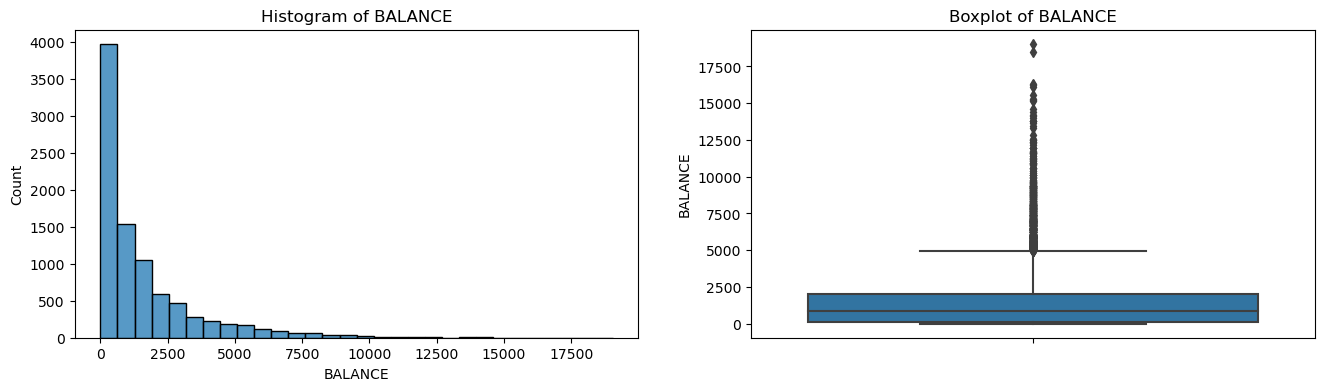

Skewness of BALANCE_FREQUENCY: -2.0232655185149078


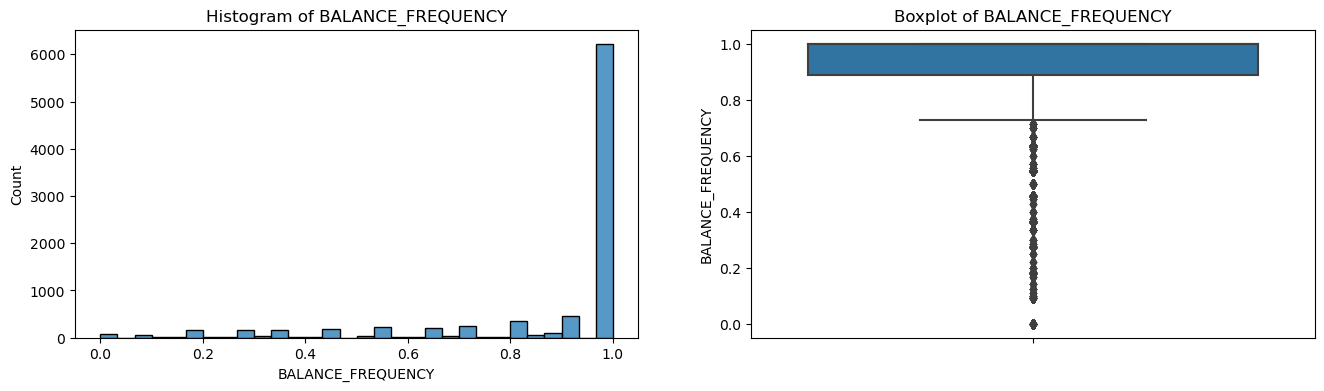

Skewness of PURCHASES: 8.144269064554651


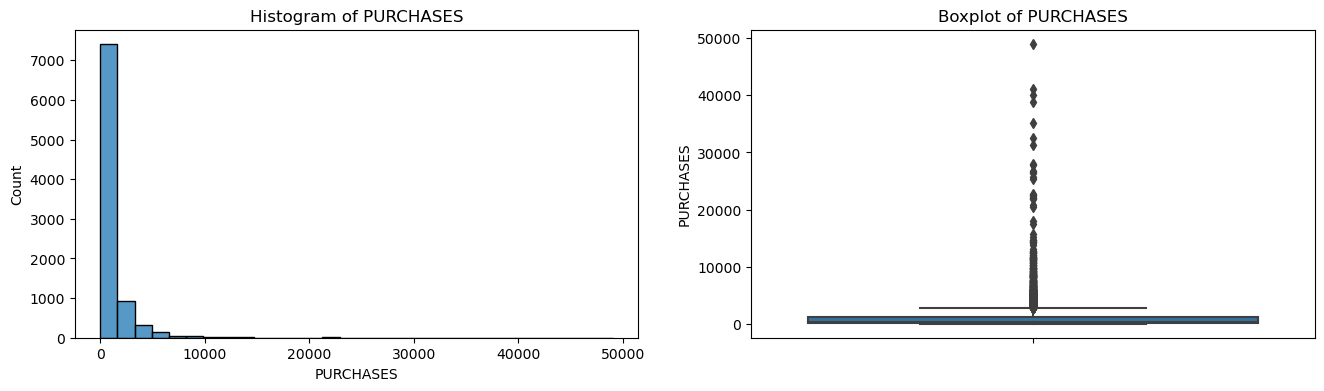

Skewness of ONEOFF_PURCHASES: 10.045082884700278


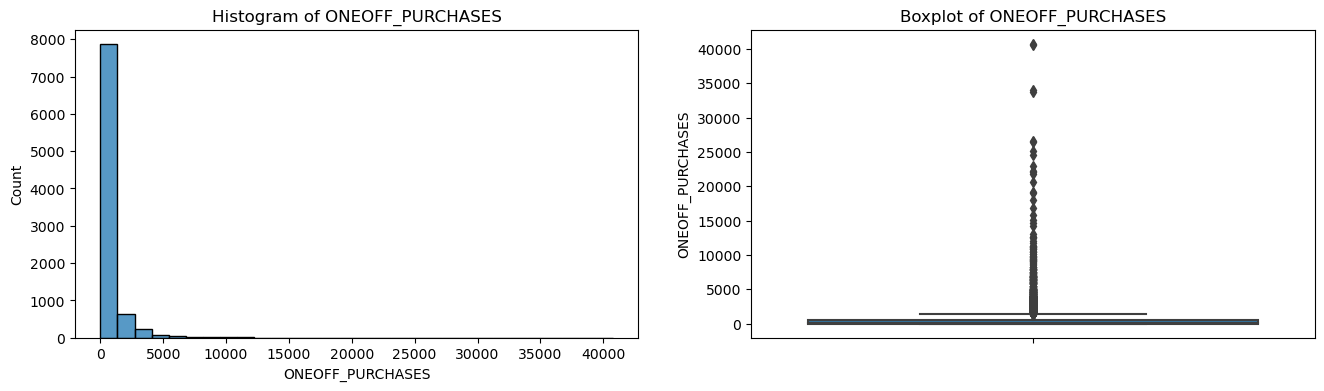

Skewness of INSTALLMENTS_PURCHASES: 7.299119908745641


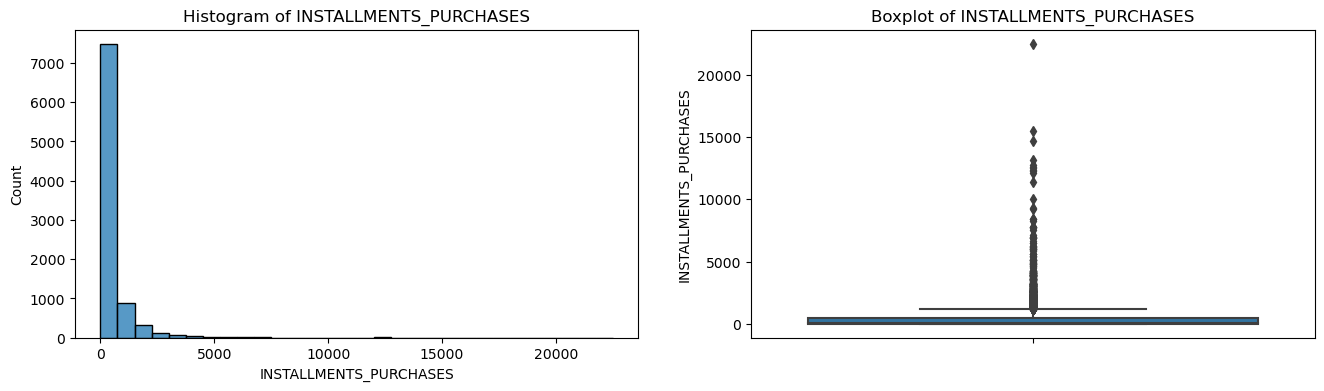

Skewness of CASH_ADVANCE: 5.166609074074723


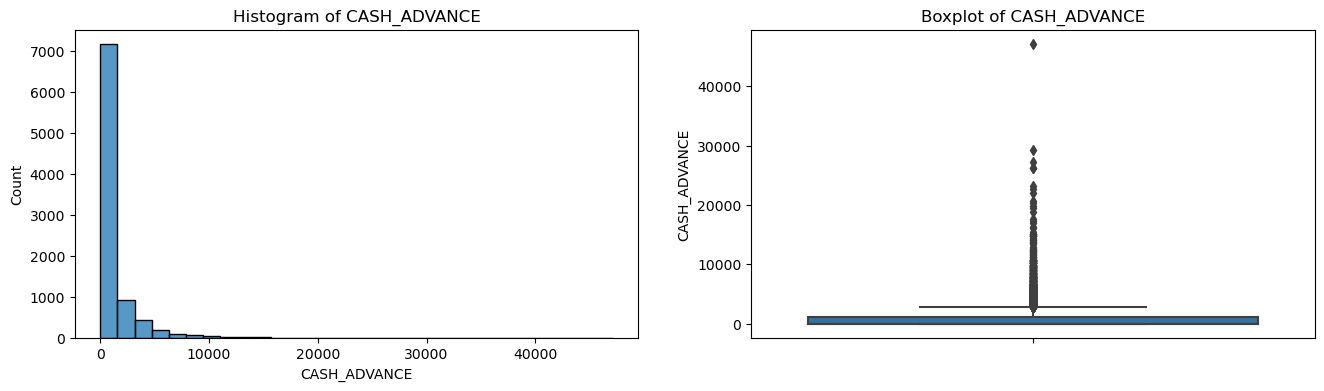

Skewness of PURCHASES_FREQUENCY: 0.06016423585803591


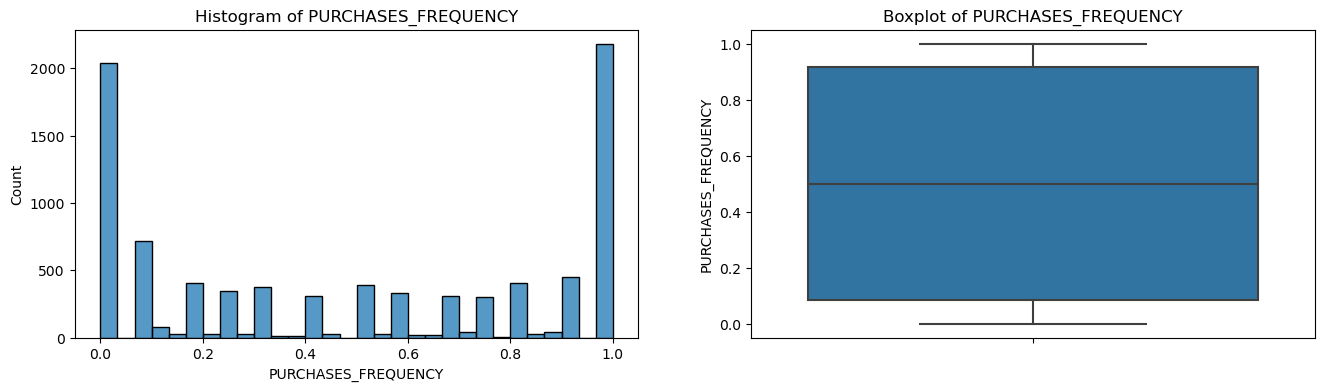

Skewness of ONEOFF_PURCHASES_FREQUENCY: 1.5356127835248519


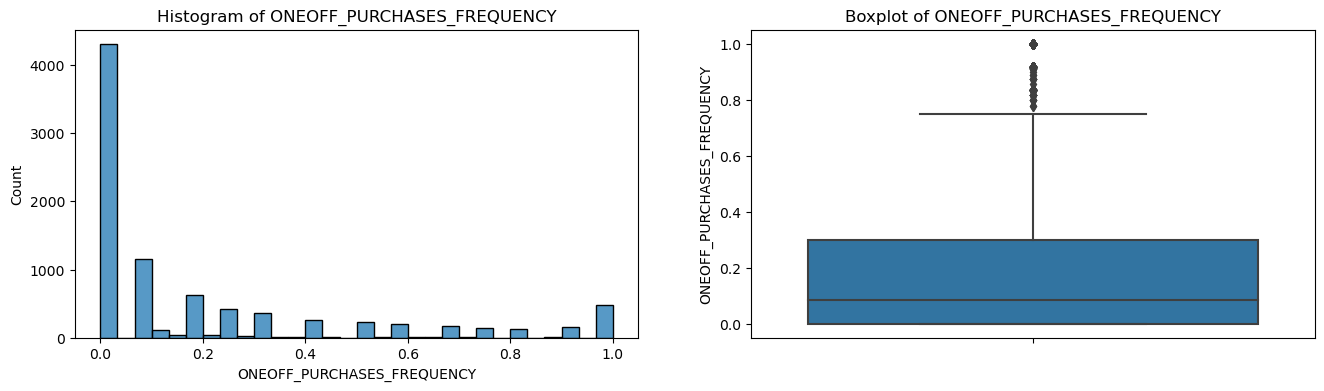

Skewness of PURCHASES_INSTALLMENTS_FREQUENCY: 0.5092011649999882


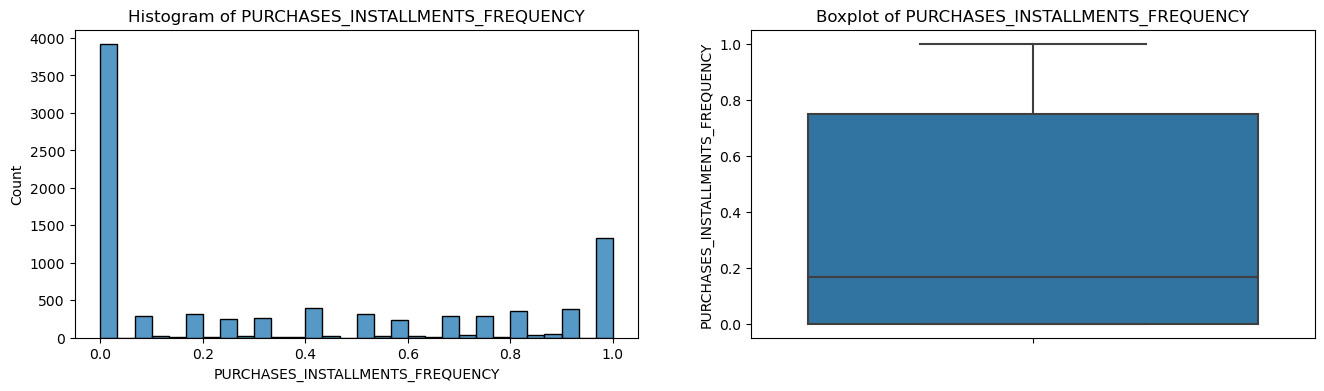

Skewness of CASH_ADVANCE_FREQUENCY: 1.828686266477852


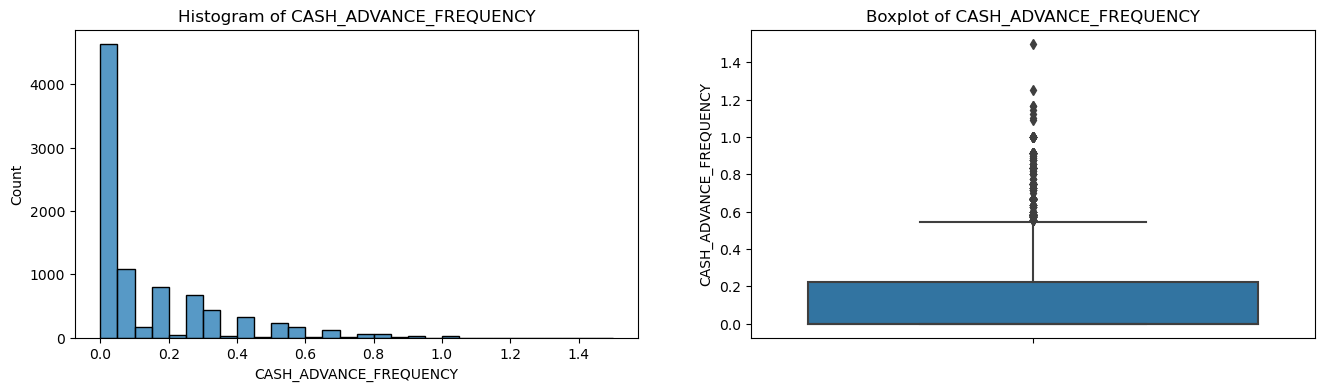

Skewness of CASH_ADVANCE_TRX: 5.721298203192298


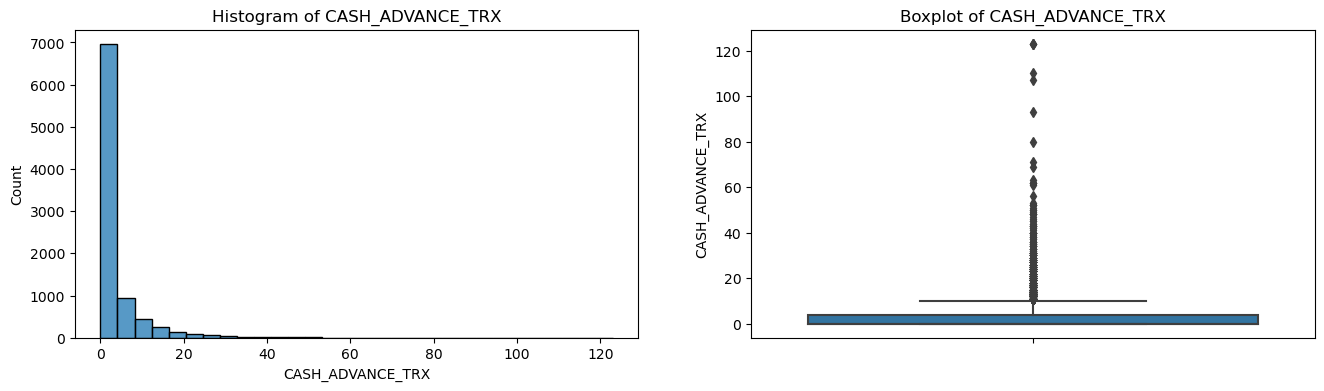

Skewness of PURCHASES_TRX: 4.630655265932403


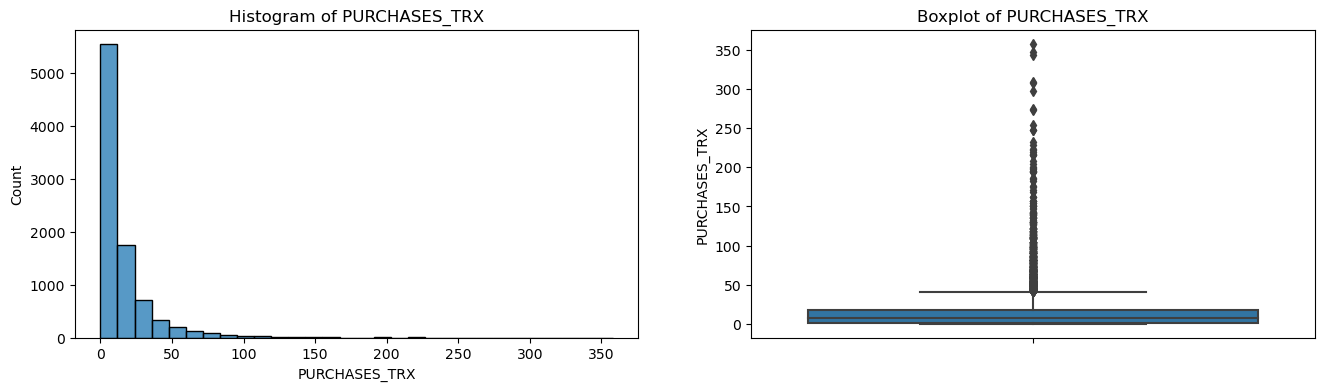

Skewness of CREDIT_LIMIT: 1.5226193263625962


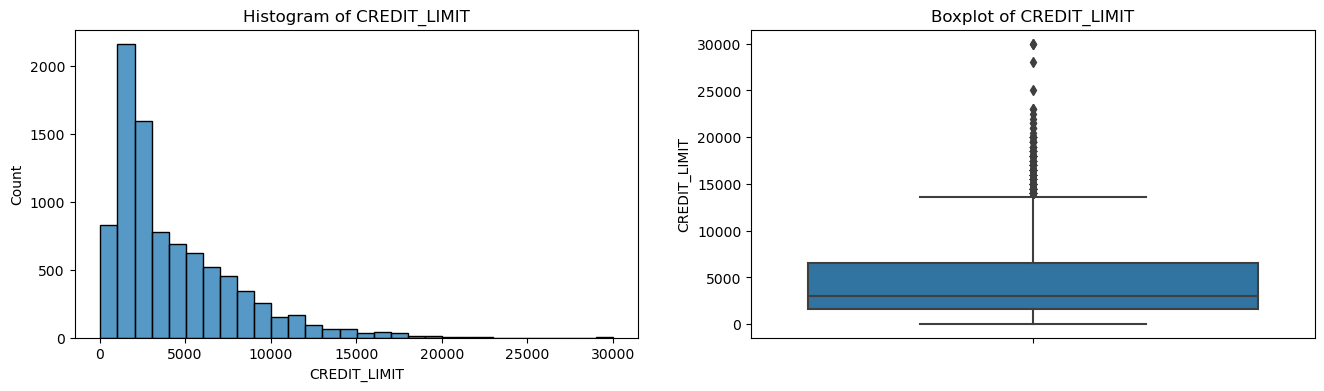

Skewness of PAYMENTS: 5.907619794397562


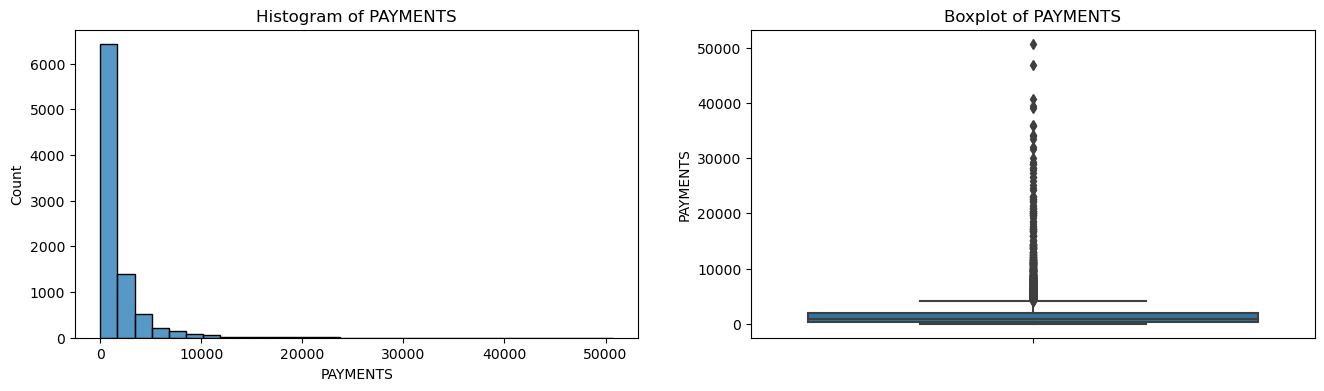

Skewness of MINIMUM_PAYMENTS: 13.184643968226238


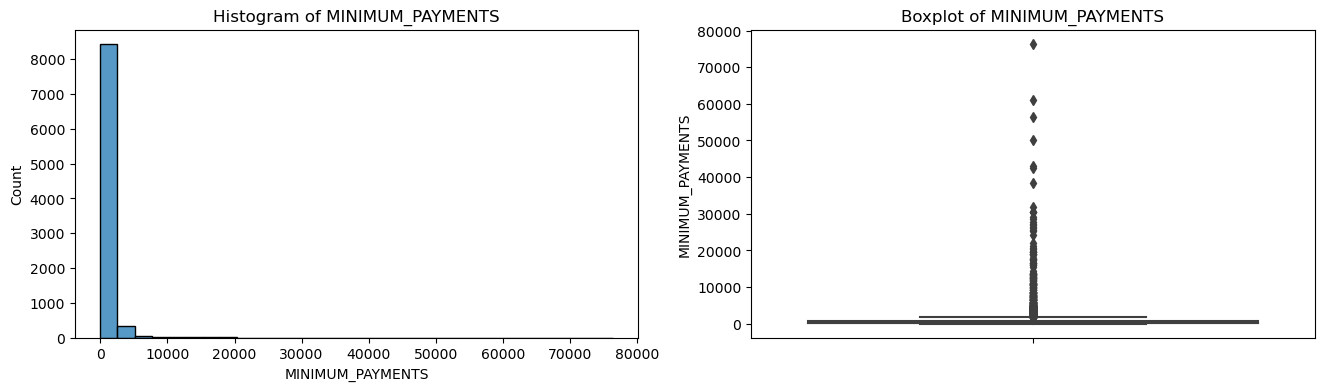

Skewness of PRC_FULL_PAYMENT: 1.942819940971858


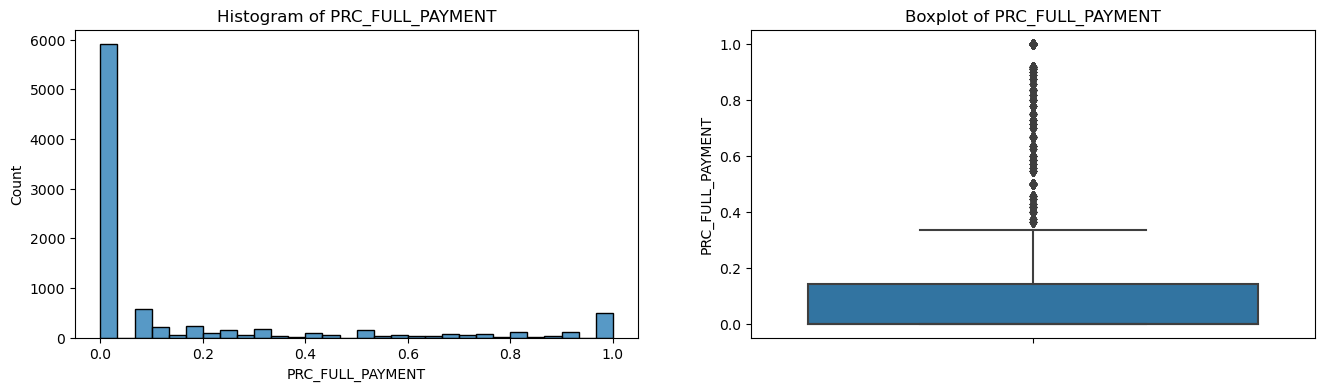

Skewness of TENURE: -2.9430172876199134


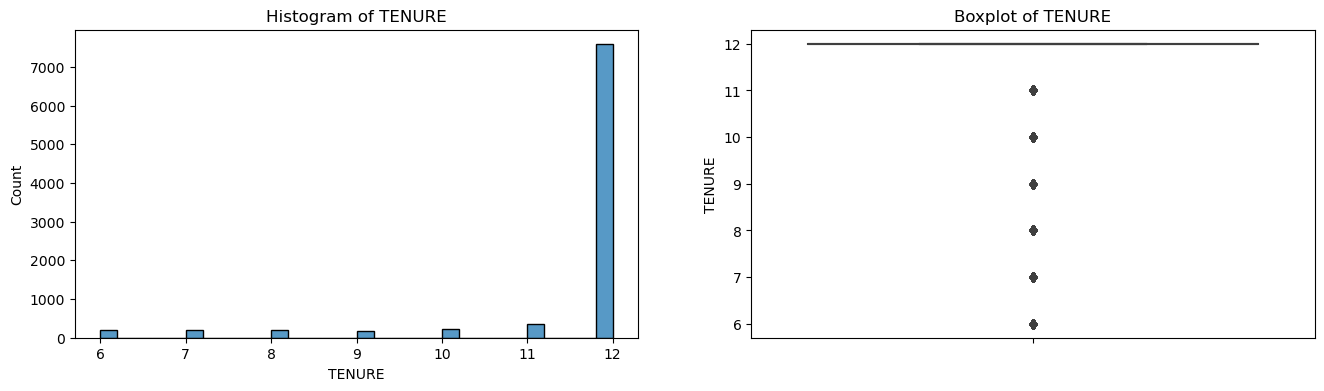

In [189]:
# Menghitung skewness dan membuat diagram distribusi
for col in numeric_columns:
    skewness = df[col].skew()
    print(f'Skewness of {col}: {skewness}')

    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], bins=30)
    plt.title(f'Histogram of {col}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')

    plt.show()

<Axes: >

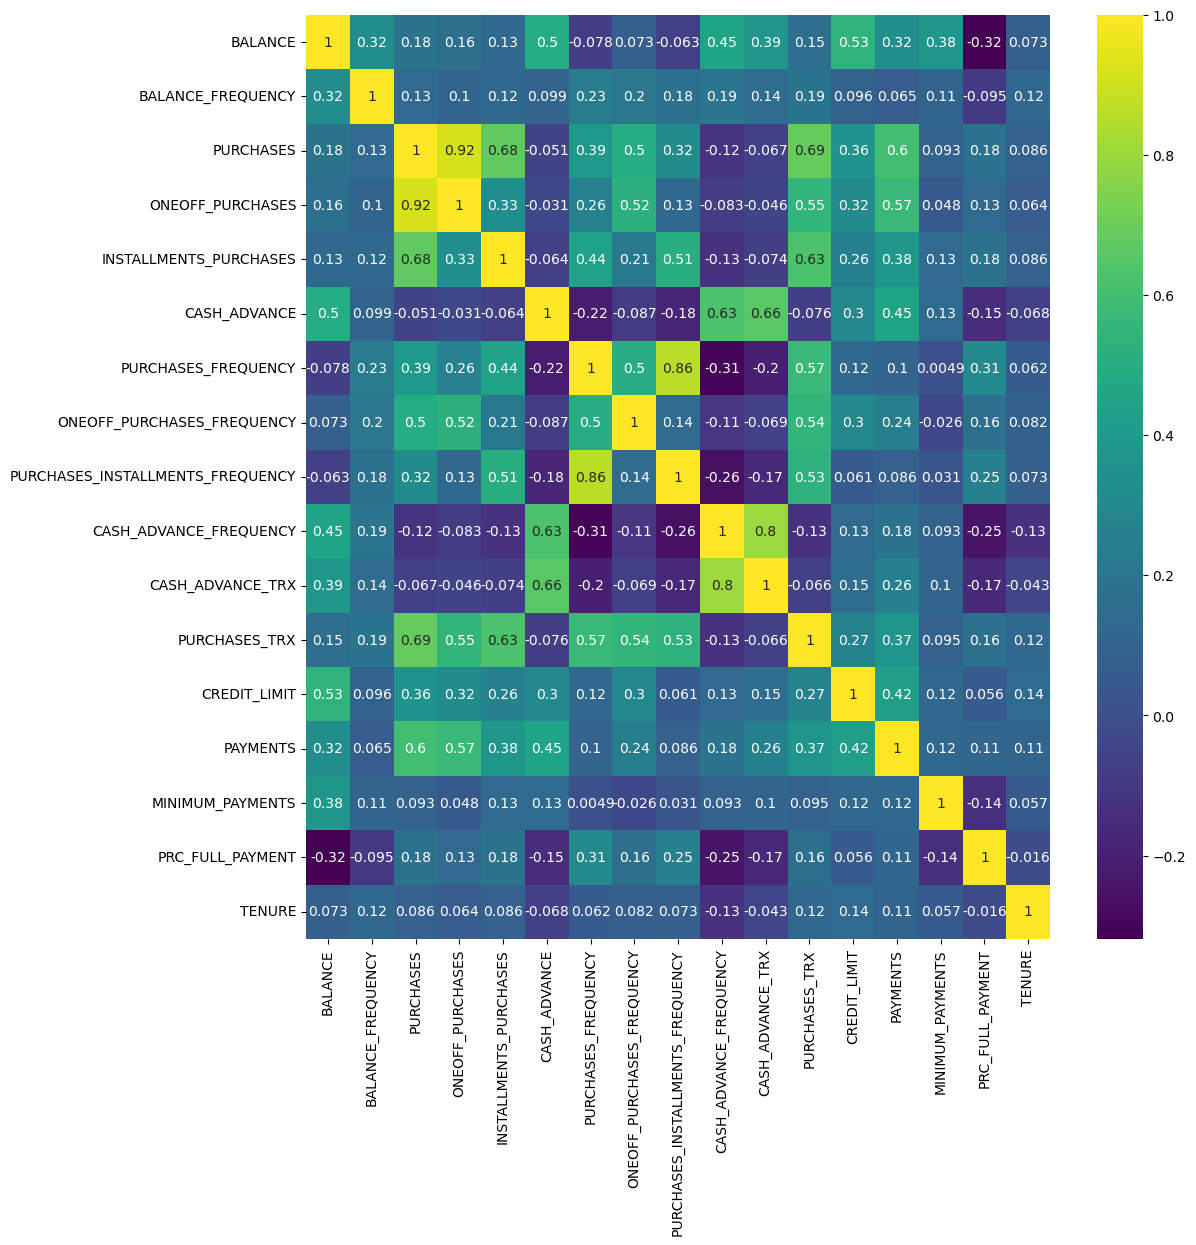

In [190]:
plt.figure(figsize = (12, 12))
sns.heatmap(df.corr(), annot=True, cmap='viridis', 
            xticklabels=df.columns,
            yticklabels=df.columns)

In [191]:
# Membuat model regresi linear
model = LinearRegression()

# Melatih model pada data pelatihan
model.fit(X_train, y_train)

# Memprediksi nilai target pada data pengujian
y_pred = model.predict(X_test)

# Menghitung mean squared error sebagai metrik evaluasi
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 4990114.079651864


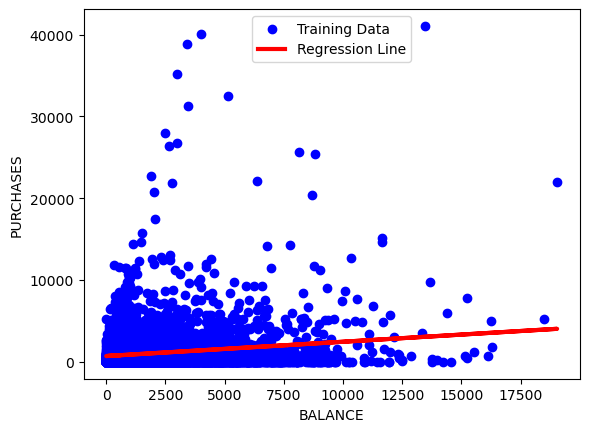

In [192]:
# Menampilkan garis regresi pada data pelatihan
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.plot(X_train, model.predict(X_train), color='red', linewidth=3, label='Regression Line')
plt.xlabel('BALANCE')
plt.ylabel('PURCHASES')
plt.legend()
plt.show()

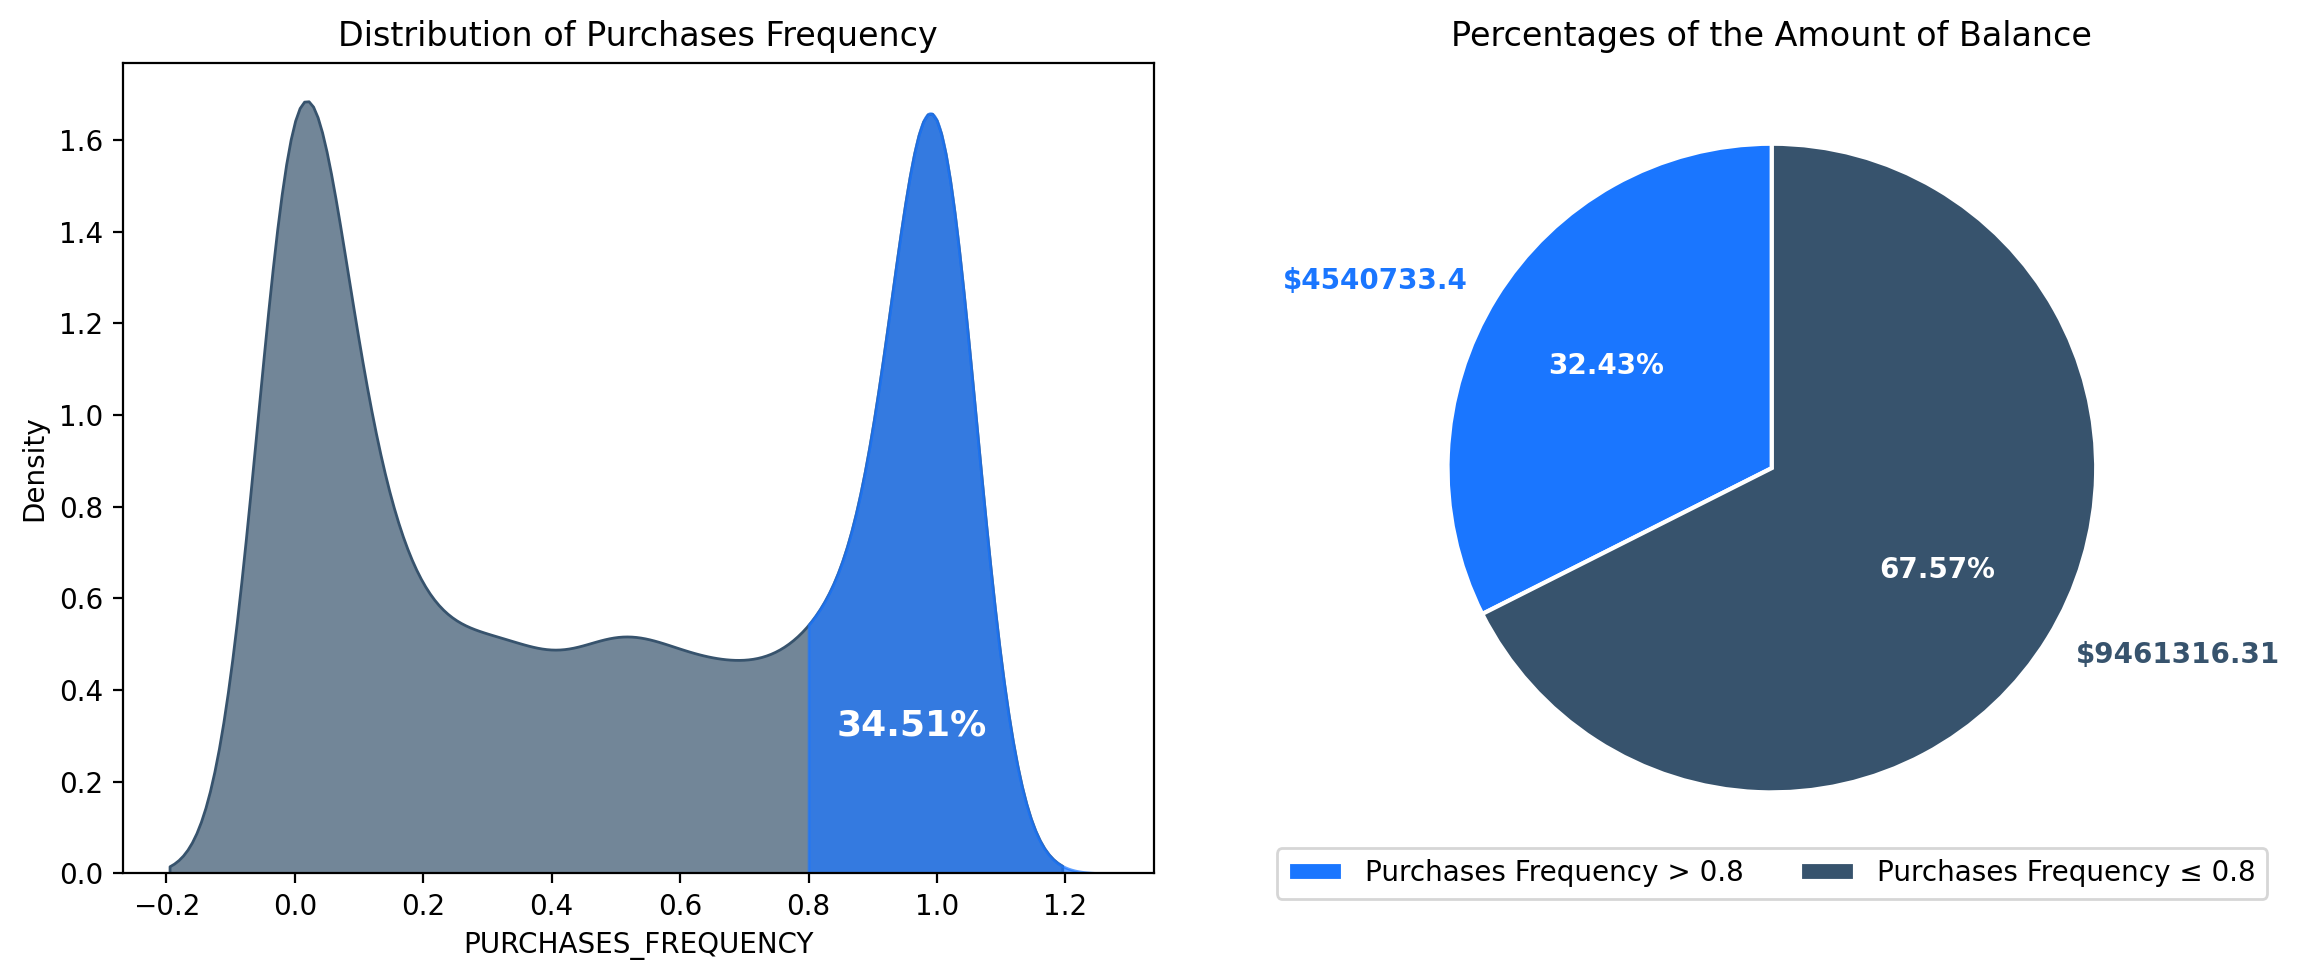

In [193]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5), dpi=200)

# KDE Plot
kde_plot = sns.kdeplot(ax=ax[0], data=df, x="PURCHASES_FREQUENCY", color="#37536d", fill=True, alpha=0.7)
xmin, xmax = kde_plot.get_xlim()
kde = gaussian_kde(df["PURCHASES_FREQUENCY"])
x = np.linspace(xmin, xmax, 10_000)
kde_y = kde(x)
x0, y0 = [], []
for i, j in zip(x, kde_y):
    if i > 0.8:
        x0.append(i)
        y0.append(j)
x0, y0 = np.array(x0), np.array(y0)
kde_plot.fill_between(x=x0, y1=y0, color="#1a76ff", alpha=0.7)
ax[0].text(
    x=0.96,
    y=0.3,
    horizontalalignment="center",
    s=f"{round(len(df[df['PURCHASES_FREQUENCY'] > 0.8]) / len(df) * 100, 2)}%",
    color="white",
    fontweight="bold",
    fontsize=13
)
ax[0].set_title("Distribution of Purchases Frequency")
ax[0].set_xlabel('PURCHASES_FREQUENCY')

# Pie Chart
labels = [f"${round(df[df['PURCHASES_FREQUENCY'] > 0.8]['BALANCE'].sum(), 2)}",
          f"${round(df[df['PURCHASES_FREQUENCY'] <= 0.8]['BALANCE'].sum(), 2)}"]
patches, texts, pcts = ax[1].pie(
    [df[df['PURCHASES_FREQUENCY'] > 0.8]["BALANCE"].sum(), df[df['PURCHASES_FREQUENCY'] <= 0.8]["BALANCE"].sum()],
    labels=labels,
    startangle=90,
    colors=["#1a76ff", "#37536d"],
    autopct="%.2f%%",
    wedgeprops={"linewidth": 1.5, "edgecolor": "white"}
)
ax[1].set_title("Percentages of the Amount of Balance")
ax[1].legend(patches, ["Purchases Frequency > 0.8", "Purchases Frequency ≤ 0.8"], ncol=2, bbox_to_anchor=(0.5, 0), loc="center")
for index, patch in enumerate(patches):
    texts[index].set_color(patch.get_facecolor())
plt.setp(pcts, color="white", fontweight="bold")
plt.setp(texts, fontweight="bold")

plt.tight_layout()
plt.show()


Total saldo pelanggan yang paling sering berbelanja dengan ambang batas pada 0,8 mencapai 32,49% dari total saldo semua nasabah.

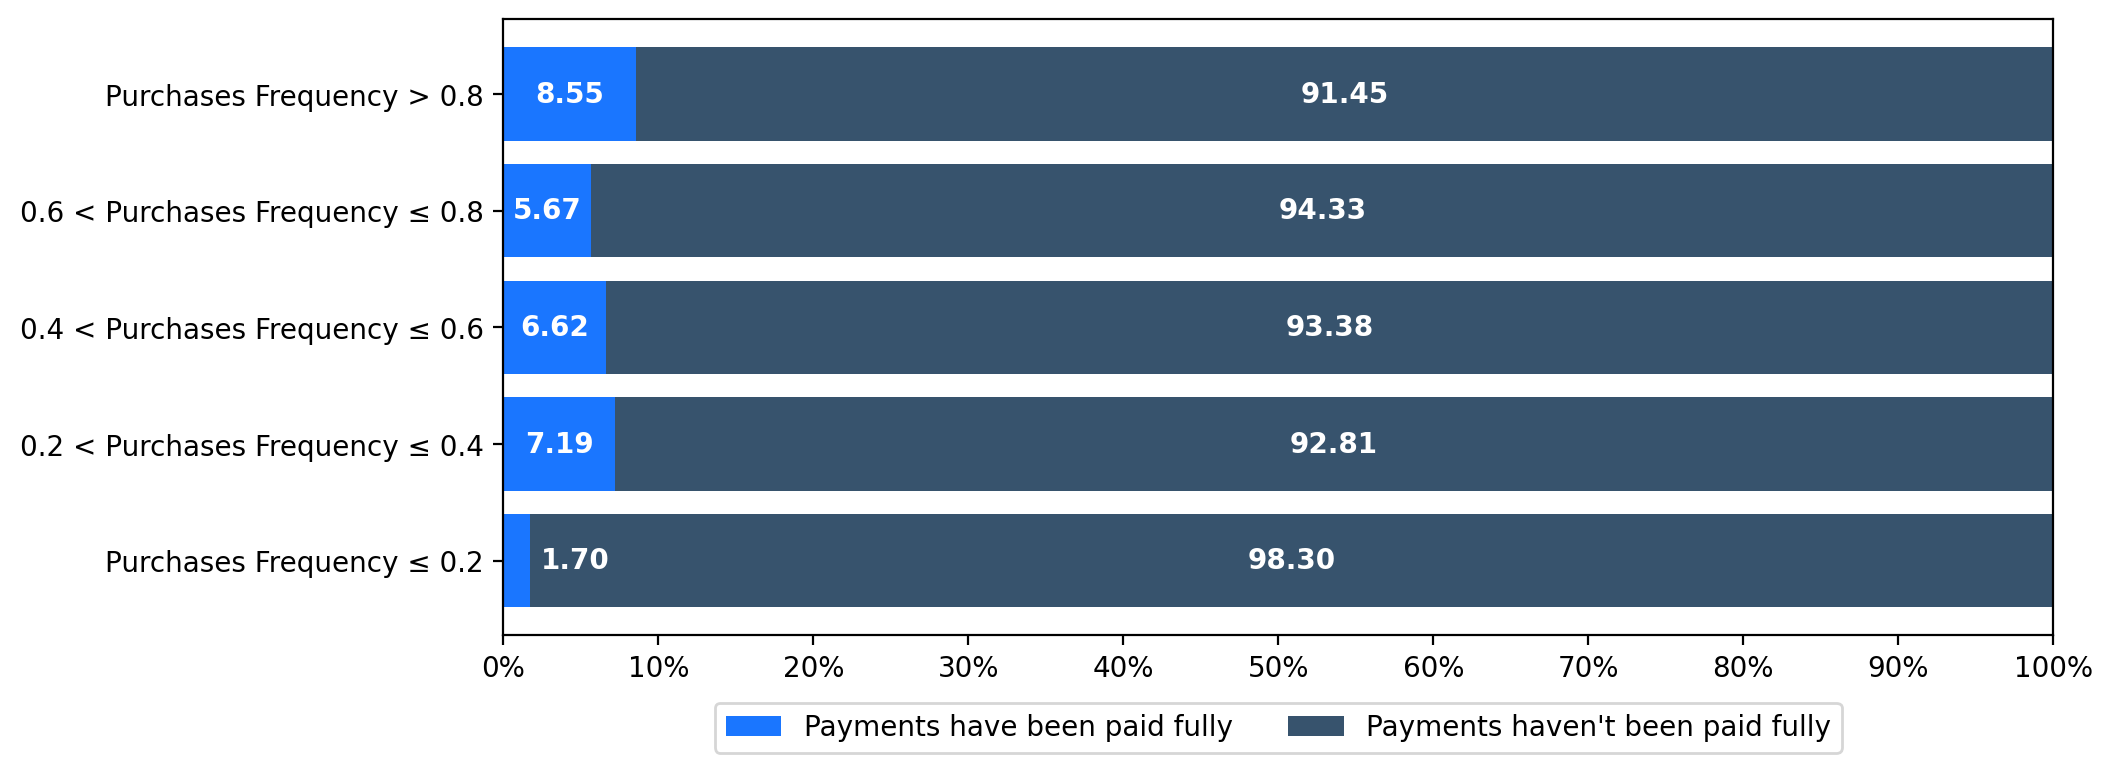

In [194]:
first = df[df["PURCHASES_FREQUENCY"] <= 0.2]
second = df[(df["PURCHASES_FREQUENCY"] > 0.2) & (df["PURCHASES_FREQUENCY"] <= 0.4)]
third = df[(df["PURCHASES_FREQUENCY"] > 0.4) & (df["PURCHASES_FREQUENCY"] <= 0.6)]
fourth = df[(df["PURCHASES_FREQUENCY"] > 0.6) & (df["PURCHASES_FREQUENCY"] <= 0.8)]
fifth = df[df["PURCHASES_FREQUENCY"] > 0.8]
labels = [
    "Purchases Frequency ≤ 0.2","0.2 < Purchases Frequency ≤ 0.4","0.4 < Purchases Frequency ≤ 0.6",
    "0.6 < Purchases Frequency ≤ 0.8","Purchases Frequency > 0.8"
]

prc_full_payment_is_1, prc_full_payment_not_1 = [], []

for subset in [first, second, third, fourth, fifth]:
    if not subset.empty:  # Check if the subset is not empty
        prc_is_1 = len(subset[subset["PRC_FULL_PAYMENT"] == 1]) / len(subset) * 100
        prc_not_1 = len(subset[subset["PRC_FULL_PAYMENT"] != 1]) / len(subset) * 100
        prc_full_payment_is_1.append(prc_is_1)
        prc_full_payment_not_1.append(prc_not_1)
    else:
        prc_full_payment_is_1.append(0)
        prc_full_payment_not_1.append(0)

fig, ax = plt.subplots(figsize=(10, 4), dpi=200)
n = 0

for label, prc_is_1, prc_not_1 in zip(labels, prc_full_payment_is_1, prc_full_payment_not_1):
    if n == 0:
        ax.barh(label, prc_is_1, color="#1a76ff", label="Payments have been paid fully")
        ax.barh(label, prc_not_1, left=prc_is_1, color="#37536d", label="Payments haven't been paid fully")
        n += 1
    else:
        ax.barh(label, prc_is_1, color="#1a76ff")
        ax.barh(label, prc_not_1, left=prc_is_1, color="#37536d")

for container in ax.containers[:1]:
    ax.bar_label(container, fmt="%.2f", padding=4, color="white", fontweight="bold")

for container in ax.containers[1:]:
    ax.bar_label(container, fmt="%.2f", label_type="center", color="white", fontweight="bold")

ax.set_xlim(xmax=100)
ax.set_xticks(np.arange(0, 101, 10), [f"{xtick}%" for xtick in np.arange(0, 101, 10)])
ax.legend(ncol=2, bbox_to_anchor=(0.5, -0.15), loc="center")

plt.show()



Hanya ada kurang dari 10% yang telah membayar lunas di setiap kelompok.

# 6. DATA PREPROCESSING

## 6.1 Outlier Handling

The code focuses on handling outliers within a DataFrame using the Winsorizing method. Winsorizing involves capping extreme values in the dataset to reduce the impact of outliers on statistical analysis and modeling.

**Code Explanation**:
1. Import and Initialize Winsorizer:
   - The code first imports the necessary module and initializes a `Winsorizer` object. Winsorization is chosen as the capping method, and both tails (left and right) are capped.
   - The 'fold' parameter is set to 1.5, which determines the multiplier for the IQR (Interquartile Range) rule boundaries.

2. Define Variables to Be Winsorized:
   - The 'variables' parameter specifies the list of variables (columns) in the DataFrame 'df' that need outlier handling. In this case, 'distance,' 'temperature,' 'visibility,' and 'dewPoint' are selected.

3. Fit the Winsorizer:
   - The Winsorizer is fitted to the DataFrame 'df' using the `fit` method. This step calculates the IQR and boundaries for each specified variable.

4. Transform Data:
   - The Winsorizer transforms the DataFrame 'df' using the `transform` method. This step replaces extreme values that fall outside the IQR boundaries with the nearest non-outlier value within the boundaries. 

5. Display Data Summary:
   - The code prints summary statistics for the DataFrame 'df' both before and after the outlier handling process. This allows for a comparison of the data distribution and the effect of outlier treatment.

6. Generate Diagnostic Plots:
   - The `diagnostic_plots` function is called to create diagnostic plots for the 'temperature' variable in the transformed DataFrame 'df_ao.' This step helps assess the distribution and presence of outliers in the variable.

7. Calculate Skewness:
   - The skewness value of the 'temperature' variable in the transformed DataFrame 'df_ao' is calculated and printed. Skewness indicates the degree of asymmetry in the variable's distribution.


In [195]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,126.386467,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [196]:
# Initialize Winsorizer for gaussian distribution
handling_outlier_gaussian = Winsorizer(capping_method='gaussian', # choose gaussian for mean and std
                          tail='both', # cap left, right or both tails 
                          fold=3,
                          variables=['PURCHASES','PURCHASES_FREQUENCY','ONEOFF_PURCHASES_FREQUENCY','PAYMENTS','PURCHASES_INSTALLMENTS_FREQUENCY','CASH_ADVANCE_FREQUENCY', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT'])

In [197]:
# perform outlier handling
handling_outlier_gaussian.fit(df)

df_ho = handling_outlier_gaussian.transform(df)

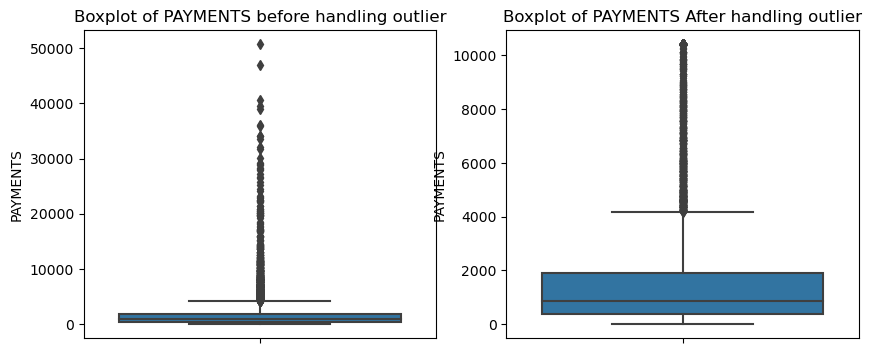

In [198]:
# Visualisasi Boxplot sebelum dan sesudah handling outlier    
plt.figure(figsize=(10, 4))

# Boxplot MinTemp
plt.subplot(1, 2, 1)
sns.boxplot(y=df['PAYMENTS'])
plt.title('Boxplot of PAYMENTS before handling outlier')

# Boxplot Rainfall
plt.subplot(1, 2, 2)
sns.boxplot(y=df_ho['PAYMENTS'])
plt.title('Boxplot of PAYMENTS After handling outlier')

plt.show()

**KESIMPULAN** : Data yang dihasilkan tidak lagi memiliki outlier dengan menggunakan winsorizer

In [199]:
# Initialize Winsorizer for gaussian distribution
handling_outlier_skewed = Winsorizer(capping_method='iqr', # choose iqr for IQR rule boundaries
                          tail='both', # cap left, right or both tails 
                          fold=3,
                          variables=['PURCHASES','ONEOFF_PURCHASES', 'BALANCE_FREQUENCY'])

In [200]:
# perform outlier handling
handling_outlier_skewed.fit(df_ho)

df_ho = handling_outlier_skewed.transform(df_ho)

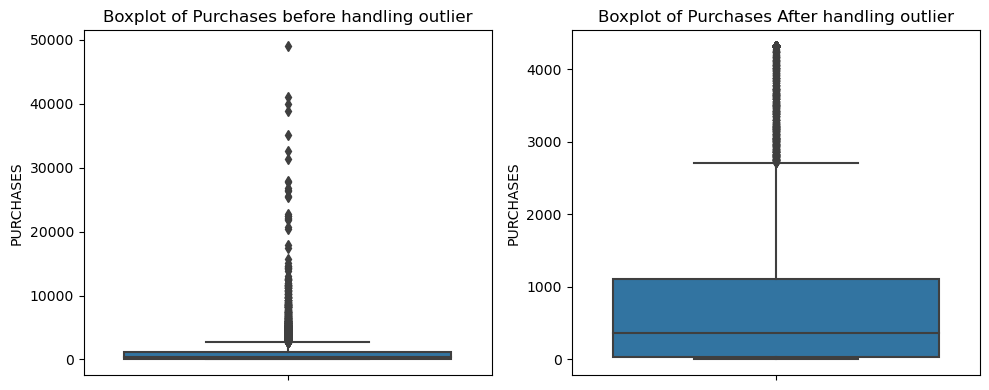

In [201]:
plt.figure(figsize=(10, 4))

# Boxplot PURCHASES
plt.subplot(1, 2, 1)
sns.boxplot(y=df['PURCHASES'])
plt.title('Boxplot of Purchases before handling outlier')

# Boxplot PURCHASES (assuming df_ho is valid)
plt.subplot(1, 2, 2)
sns.boxplot(y=df_ho['PURCHASES'])
plt.title('Boxplot of Purchases After handling outlier')

plt.tight_layout()  # Add this line to ensure proper spacing between subplots
plt.show()

In [202]:
# Print data summaries, generate diagnostic plots, and calculate skewness
print('Dataframe - Before Capping')
print(df.describe())
print('')
print('Dataframe - After Capping')
print(df_ho.describe())

Dataframe - Before Capping
            BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000     

In [203]:
# Menampilkan jumlah nilai unik pada kolom 'BALANCE'
len(df_ho['BALANCE'].value_counts())

8871

In [204]:
# Menampilkan jumlah nilai unik pada kolom 'BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS'
df_ho[['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS']].value_counts()

BALANCE       PURCHASES  CASH_ADVANCE  CREDIT_LIMIT  PAYMENTS      MINIMUM_PAYMENTS
0.000000      0.000      72.388903     3000.0        197.845282    136.804417          1
1514.750841   3873.500   2306.919698   8500.0        3729.948989   436.253648          1
1509.525178   0.000      1784.023712   3500.0        513.387513    518.481808          1
1510.111755   1895.250   0.000000      9000.0        1711.895180   313.131912          1
1512.218864   1002.930   0.000000      4000.0        328.446221    344.205824          1
                                                                                      ..
277.308988    1588.340   0.000000      2500.0        1316.907062   217.359470          1
276.932920    0.000      936.594730    1000.0        247.914645    152.028346          1
276.446975    1429.390   0.000000      2800.0        1296.041874   193.607553          1
276.213858    449.860    0.000000      1000.0        1605.512753   199.950493          1
19043.138560  4321.615   0

**KESIMPULAN:** <br>
- Kolom yang memiliki outlier adalah 'BALANCE'
- Kolom yang memiliki distribusi Normal adalah 'BALANCE_FREQUENCY', 'INSTALLMENTS_PURCHASES', 'PURCHASES_FREQUENCY','ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'
- Kolom yang memiliki distribusi skewed adalah 'PURCHASES', 'ONEOFF_PURCHASES'

## 6.2 Normalization

In [205]:
df_ho.sample()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8335,801.688726,1.0,325.92,0.0,325.92,0.0,1.0,0.0,1.0,0.0,0,12,1000.0,484.790462,224.451595,0.0,12


In [206]:
# define the feature matrix X and the target variable y
X = df_ho.drop(columns='TENURE')
y = df_ho['TENURE']


In [207]:
y

0       12
1       12
2       12
3       12
4       12
        ..
8945     6
8946     6
8947     6
8948     6
8949     6
Name: TENURE, Length: 8950, dtype: int64

2. **Inisialisasi Robust Scaler untuk X dan y:**
   - Dua penskalaan terpisah (`scaler_X` dan `scaler_y`) diinisialisasi masing-masing untuk fitur dan variabel target.

In [208]:
# Initialize the Robust Scaler
fiture_scaler = RobustScaler()

3. *Penyesuaian dan Transformasi Data:**
   - Matriks fitur (`X`) disesuaikan dan ditransformasikan menggunakan `scaler_X`.
   - Variabel target (`y`) disesuaikan dan ditransformasikan menggunakan `scaler_y`.

In [209]:
# Scale the Data
fiture_scaler.fit(X)

RobustScaler()

In [210]:
# Melakukan scaling pada data fiture
scaled_fiture = fiture_scaler.transform(X)

4. **Konversi ke DataFrame:**
   - Matriks fitur yang diskalakan (`X_scaled`) dikonversi kembali ke DataFrame dengan nama kolom asli.
   - Variabel target yang diskalakan (`y_scaled`) diratakan untuk memastikan kompatibilitas dengan beberapa model pembelajaran mesin.

In [211]:
# Convert to DataFrame
scaled_fiture = pd.DataFrame(scaled_fiture, columns=X.columns)

In [212]:
print("X shape =", X.shape)
print("y shape =",y.shape)

X shape = (8950, 16)
y shape = (8950,)


In [213]:
# Display the Normalized Data
X.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,126.386467,0.000000
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000


# 7. PENDEFINISIAN MODEL

Kode ini bertanggung jawab untuk mendefinisikan dan melatih model machine learning Random Forest

**Penjelasan Kode**:

 **Model Unsupervised Learning**:
   - Model Kmeans dibuat menggunakan kelas `KMeans` dari modul `sklearn.cluster`.
   - Parameter yang digunakan:
     - `random_state=42`: Seed untuk generator angka acak untuk memastikan reproduktibilitas.
     - `n_clusters`: Untuk menentukan jumlah cluster yang dbuat
   - Model `PCA(Principal Component Analysis)` dibuat menggunakan kelas `PCA` dari modul `sklearn.decomposition`.
      - `random_state=42`: Seed untuk generator angka acak untuk memastikan reproduktibilitas.
      - `n_clusters`: Untuk menentukan jumlah cluster yang dbuat
     

In [215]:
df_ho['TENURE'].value_counts()

12    7584
11     365
10     236
6      204
8      196
7      190
9      175
Name: TENURE, dtype: int64

In [216]:
# Menentukan jumlah kluster
n_clusters = 6

# Membuat model K-Means
model_kmeans = KMeans(n_clusters=n_clusters, random_state=42)
model_pca = PCA(n_components=n_clusters, random_state=42)

# 8. PELATIHAN MODEL

Kode ini bertanggung jawab untuk melatih model machine learning yang telah didefinisikan sebelumnya, yaitu model  Random Forest (`random_forest`) 

**Penjelasan Kode**:

**Melatih Model Machine Learning**:
   - Model unsupervised learning (`PCA`) dan (`Kmeans`) dilatih menggunakan metode `fit` pada data latih (X).




 kode ini menjalankan proses pelatihan model machine learning menggunakan data latih (X_train dan y_train). Setelah proses pelatihan selesai, model dapat digunakan untuk membuat prediksi pada data baru. 

In [217]:
# Latih model pada data latih
model_kmeans.fit(X)
model_pca.fit(X)

PCA(n_components=6, random_state=42)

# 9. EVALUASI MODEL

Kode ini melakukan evaluasi terhadap model machine learning yang telah dilatih sebelumnya.

1. Prediksi dan Akurasi:
   - Membuat clustering menggunakan `PCA` dan `Kmeans`
   - Dari hasil clustering akan di prediksi `TENURE` menggunakan `Logistic Regression` dan `Random Forest`

2. Matriks Konfusi:
   - Membuat matriks konfusi untuk hasil prediksi pada data uji menggunakan `confusion_matrix`.
   - Menampilkan matriks konfusi dalam bentuk heatmap.
   

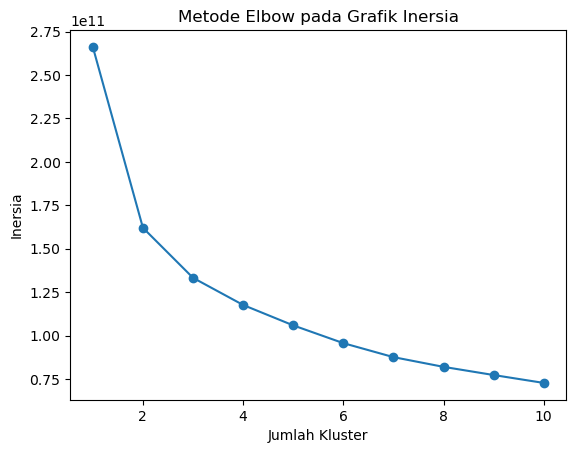

In [218]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Menggunakan model K-Means setelah PCA
model_pca = PCA(n_components=n_clusters)
principalComponents = model_pca.fit_transform(X)

# Menghitung inersia untuk jumlah kluster yang berbeda
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(principalComponents)
    inertia.append(kmeans.inertia_)

# Plotting grafik inersia
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Metode Elbow pada Grafik Inersia')
plt.xlabel('Jumlah Kluster')
plt.ylabel('Inersia')
plt.show()

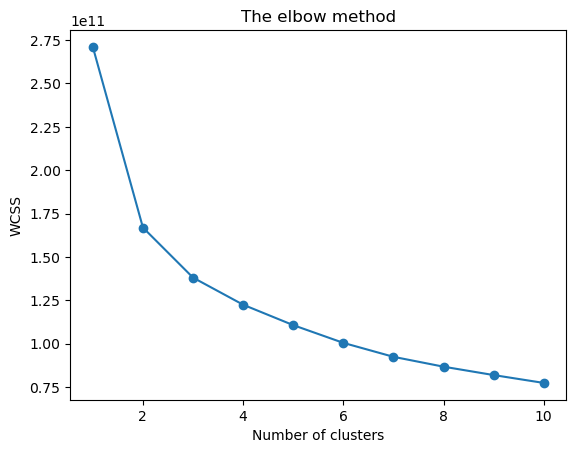

In [219]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

**KESIMPULAN:** Dari plot diatas dapat disimpulkan bahwa cluster yang paling baik adalah di antara (4-6)

In [220]:
clusters = model_kmeans.predict(X)
# Menambahkan kolom cluster ke DataFrame
df_predict = df_ho.copy()
df_predict['Cluster'] = clusters

# Melihat hasil clustering
print(df_predict[['TENURE', 'Cluster']])

      TENURE  Cluster
0         12        4
1         12        3
2         12        1
3         12        1
4         12        4
...      ...      ...
8945       6        4
8946       6        4
8947       6        4
8948       6        4
8949       6        4

[8950 rows x 2 columns]


In [221]:
principalComponents = model_pca.transform(X)

principal_Df = pd.DataFrame(data=principalComponents,
                                   columns=['principal component 1', 'principal component 2', 
                                            'principal component 3', 'principal component 4',
                                            'principal component 5', 'principal component 6'])

principal_Df

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6
0,-4304.245585,38.288155,-203.870055,266.513356,-124.361550,-96.074987
1,4702.347224,4156.240970,-44.314092,2596.425074,-146.503818,188.760778
2,2237.843187,-2057.622356,-1567.261514,-248.820352,-52.763511,-454.870881
3,1878.011582,-2640.649578,-1291.298907,310.698259,1085.344482,-326.371161
4,-3721.938260,403.467168,-220.788053,-168.908454,-418.557265,-479.847166
...,...,...,...,...,...,...
8945,-4246.200652,12.760690,23.540542,217.861905,21.239908,-125.441791
8946,-4188.082599,137.228380,-95.561975,-105.083876,-111.180079,454.304674
8947,-4344.850563,-22.409116,-253.894558,284.384735,-10.722253,-101.125375
8948,-4789.885500,251.929003,-274.407696,282.938753,-83.295170,-191.795027


<Figure size 640x480 with 0 Axes>

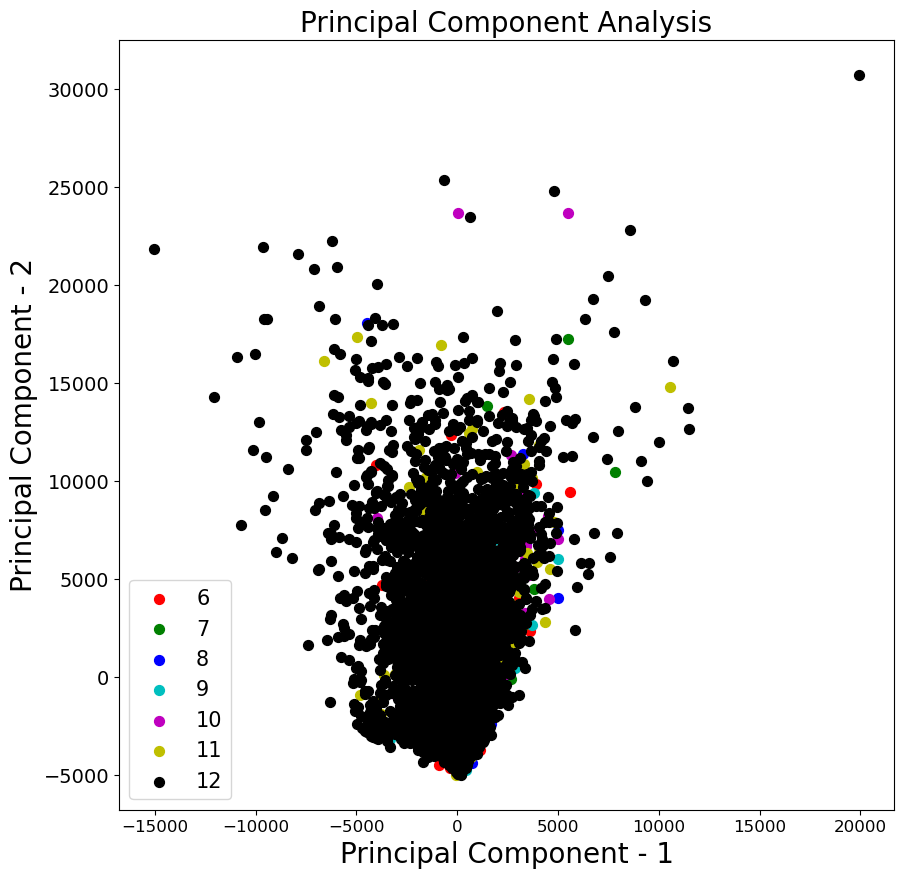

In [222]:
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis",fontsize=20)
targets = [6, 7, 8, 9, 10, 11, 12]
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
for target, color in zip(targets,colors):
    indicesToKeep = df_ho['TENURE'] == target
    plt.scatter(principal_Df.loc[indicesToKeep, 'principal component 4']
               , principal_Df.loc[indicesToKeep, 'principal component 1']
               , c = color, s = 50)

plt.legend(targets,prop={'size': 15})

plt.show()

In [223]:
principal_Df['TENURE'] = df_ho['TENURE']
principal_Df.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,TENURE
0,-4304.245585,38.288155,-203.870055,266.513356,-124.361550,-96.074987,12
1,4702.347224,4156.240970,-44.314092,2596.425074,-146.503818,188.760778,12
2,2237.843187,-2057.622356,-1567.261514,-248.820352,-52.763511,-454.870881,12
3,1878.011582,-2640.649578,-1291.298907,310.698259,1085.344482,-326.371161,12
4,-3721.938260,403.467168,-220.788053,-168.908454,-418.557265,-479.847166,12


## 9.1 Split Data

Kode ini bertanggung jawab untuk membagi dataset menjadi set pelatihan dan pengujian, langkah dasar dalam pengembangan model machine learning. Pembagian ini memungkinkan pelatihan dan evaluasi model pada set data yang berbeda.
Kode ini bertanggung jawab untuk memisahkan dataset menjadi set pelatihan dan pengujian, sebuah langkah mendasar dalam pengembangan model pembelajaran mesin. Pemisahan ini memungkinkan pelatihan dan evaluasi model pada set data yang berbeda.

**Penjelasan Kode**:

1. 2. **Pisahkan Data**:
   - Fungsi `train_test_split` dari modul `sklearn.model_selection` digunakan untuk melakukan pemisahan data. Fungsi ini mengambil parameter berikut:
     - `X`: Matriks fitur.
     - `y`: Variabel target.
     - `test_size`: Proporsi data yang akan dialokasikan ke set pengujian. Dalam kasus ini, ini diatur ke 30% (0,3).
     - `random_state`: Benih untuk generator bilangan acak untuk memastikan reproduktifitas.

2. **Output**:
   - Hasil dari pembagian data adalah empat set data:
     - `X_train`: Matriks fitur untuk set pelatihan.
     - `X_test`: Matriks fitur untuk set pengujian.
     - `y_train`: Variabel target untuk set pelatihan.
     - `y_test`: Variabel target untuk set pengujian.

In [224]:
X = principal_Df.drop(columns = 'TENURE')
y = principal_Df['TENURE']

In [225]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

### 9.2 Make a Model Logistic Regression

In [226]:
model_logit = LogisticRegression(random_state=42)
model_logit.fit(X_train, y_train)

print(model_logit.score(X_train, y_train))
print(model_logit.score(X_test, y_test))

0.8429678188319428
0.8574620196604111


Akurasi training:  0.8429678188319428
Akurasi Uji:  0.8574620196604111
              precision    recall  f1-score   support

           6       0.33      0.03      0.05        37
           7       0.00      0.00      0.00        41
           8       0.00      0.00      0.00        53
           9       0.00      0.00      0.00        40
          10       0.00      0.00      0.00        57
          11       0.00      0.00      0.00        90
          12       0.86      1.00      0.92      1920

    accuracy                           0.86      2238
   macro avg       0.17      0.15      0.14      2238
weighted avg       0.74      0.86      0.79      2238



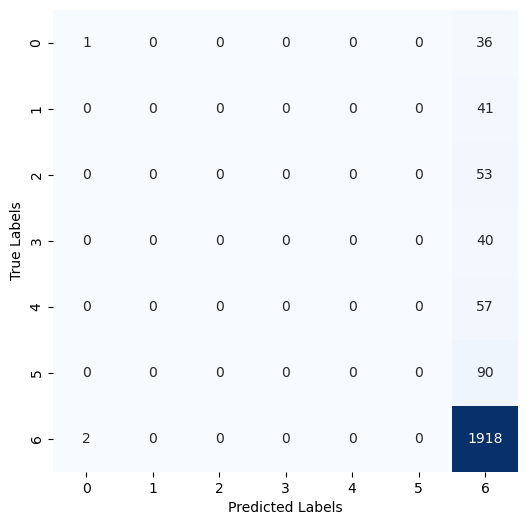

In [227]:
# Melakukan prediksi pada variabel training dan testing
y_train_pred_logic =model_logit.predict(X_train)
y_test_pred_logic = model_logit.predict(X_test)

# Melihat hasil akurasi prediksi
print("Akurasi training: ", accuracy_score(y_train, y_train_pred_logic))
print("Akurasi Uji: ", accuracy_score(y_test, y_test_pred_logic))
print(classification_report(y_test, y_test_pred_logic))

# Buat matriks konfusi dari hasil prediksi testing model machine learning
cm_logic = confusion_matrix(y_test, y_test_pred_logic)
plt.figure(figsize=(6, 6))
sns.heatmap(cm_logic, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

### 9.3 Make a Model Logistic Regression with class_weight='balanced'

In [228]:
model_logit_balanced = LogisticRegression(random_state=42, class_weight='balanced')
model_logit_balanced.fit(X_train, y_train)

print(model_logit_balanced.score(X_train, y_train))
print(model_logit_balanced.score(X_test, y_test))

0.42565554231227654
0.42180518319928506


Akurasi training:  0.42565554231227654
Akurasi Uji:  0.42180518319928506
              precision    recall  f1-score   support

           6       0.05      0.41      0.09        37
           7       0.04      0.37      0.07        41
           8       0.01      0.02      0.01        53
           9       0.02      0.03      0.02        40
          10       0.04      0.07      0.05        57
          11       0.05      0.19      0.07        90
          12       0.93      0.46      0.62      1920

    accuracy                           0.42      2238
   macro avg       0.16      0.22      0.14      2238
weighted avg       0.80      0.42      0.54      2238



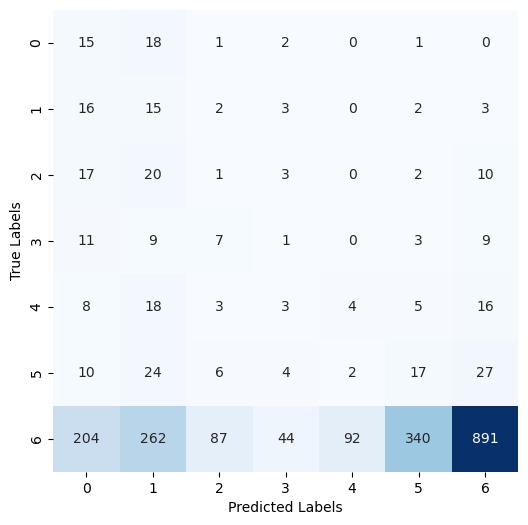

In [229]:
# Melakukan prediksi pada variabel training dan testing
y_train_pred_logic =model_logit_balanced.predict(X_train)
y_test_pred_logic = model_logit_balanced.predict(X_test)

# Melihat hasil akurasi prediksi
print("Akurasi training: ", accuracy_score(y_train, y_train_pred_logic))
print("Akurasi Uji: ", accuracy_score(y_test, y_test_pred_logic))
print(classification_report(y_test, y_test_pred_logic))

# Buat matriks konfusi dari hasil prediksi testing model machine learning
cm_logic = confusion_matrix(y_test, y_test_pred_logic)
plt.figure(figsize=(6, 6))
sns.heatmap(cm_logic, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

### 9.4 Make a Model Logistic Regression with SMOTE

Jumlah sampel sebelum oversampling: 6712
Jumlah sampel setelah oversampling: 39648
Akurasi training:  0.4410011918951132
Akurasi Uji:  0.44727435210008937
              precision    recall  f1-score   support

           6       0.07      0.57      0.12        37
           7       0.04      0.27      0.06        41
           8       0.00      0.00      0.00        53
           9       0.03      0.07      0.04        40
          10       0.03      0.07      0.05        57
          11       0.05      0.20      0.08        90
          12       0.94      0.49      0.65      1920

    accuracy                           0.45      2238
   macro avg       0.16      0.24      0.14      2238
weighted avg       0.81      0.45      0.56      2238



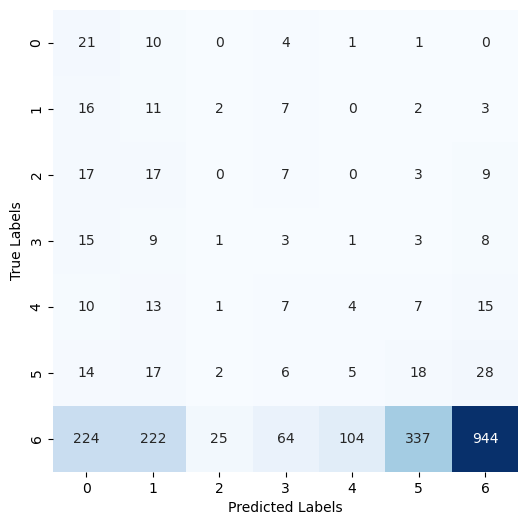

In [230]:
# Membuat model model machine learning
model_logic_smote = LogisticRegression(random_state=42)

# Menampilkan jumlah sampel sebelum oversampling
print("Jumlah sampel sebelum oversampling:", len(X_train))

# Melakukan oversampling dengan SMOTE
smote = SMOTE(random_state=42)
X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train, y_train)

# Menampilkan jumlah sampel setelah oversampling
print("Jumlah sampel setelah oversampling:", len(X_train_oversampled))

# mentraining model machine learning
model_logic_smote.fit(X_train_oversampled, y_train_oversampled)

# Melakukan prediksi pada variabel training dan testing
y_train_pred_logic =model_logic_smote.predict(X_train)
y_test_pred_logic = model_logic_smote.predict(X_test)

# Melihat hasil akurasi prediksi
print("Akurasi training: ", accuracy_score(y_train, y_train_pred_logic))
print("Akurasi Uji: ", accuracy_score(y_test, y_test_pred_logic))
print(classification_report(y_test, y_test_pred_logic))

# Buat matriks konfusi dari hasil prediksi testing model machine learning
cm_logic = confusion_matrix(y_test, y_test_pred_logic)
plt.figure(figsize=(6, 6))
sns.heatmap(cm_logic, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

### 9.5 Make a Model Random Forest

Akurasi training (2):  0.8912395709177592
Akurasi Uji (2):  0.7497765862377123
              precision    recall  f1-score   support

           6       0.12      0.27      0.17        37
           7       0.12      0.20      0.15        41
           8       0.09      0.11      0.10        53
           9       0.05      0.07      0.06        40
          10       0.01      0.02      0.02        57
          11       0.06      0.04      0.05        90
          12       0.91      0.86      0.88      1920

    accuracy                           0.75      2238
   macro avg       0.19      0.22      0.20      2238
weighted avg       0.79      0.75      0.77      2238



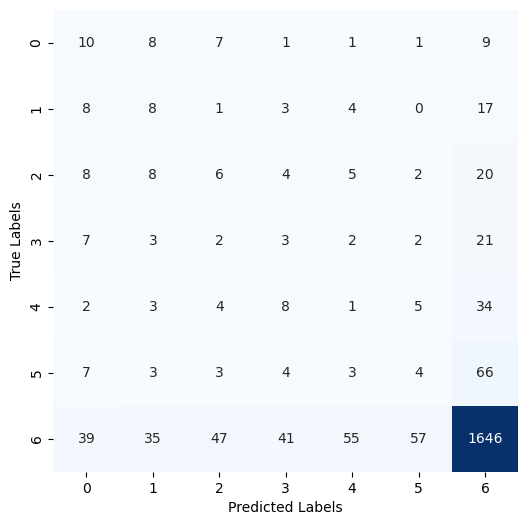

In [231]:
model_rf = RandomForestClassifier(min_samples_leaf = 5, min_samples_split = 10,n_estimators=11, random_state=42, class_weight ='balanced')
model_rf.fit(X_train, y_train)

# Prediksi menggunakan set uji
y_train_pred = model_rf.predict(X_train)
y_test_pred = model_rf.predict(X_test)

# Melihat hasil akurasi prediksi
print("Akurasi training (2): ", accuracy_score(y_train, y_train_pred))
print("Akurasi Uji (2): ", accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

# Buat matriks konfusi dari hasil prediksi testing model RandomForestClassifier (2)
cm_2 = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm_2, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

**KESIMPULAN:** Dari model logistic regression dan random forest didapatkan hasil akurasi dimana random forest lebih baik dari pada logistic regression.

# 10. MODEL INFERENCE

1. DataFrame df_new_data dibuat dengan 16 baris data acak untuk memperoleh hasil prediksi.
2. Fitur baru diubah skala menggunakan fiture_scalar yang sebelumnya telah diinisialisasi.
3. Prediksi dilakukan pada fitur baru menggunakan model PCA dan Logistic regression dengan penanganan ketidakseimbangan (balanced)

In [232]:
df.sample()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2115,740.826233,1.0,2055.13,302.05,1753.08,0.0,1.0,0.916667,1.0,0.0,0,74,7500.0,1631.166246,217.082846,0.0,12


In [233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [234]:
len(df.columns)

17

In [235]:
df_ho.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.906755,838.825025,427.667802,411.067645,978.871112,0.490351,0.202458,0.364437,0.132472,3.248827,14.709832,4494.338339,1608.113577,759.578593,0.153715,11.517318
std,2081.531879,0.161330,1144.158119,688.293846,904.338115,2097.163877,0.401371,0.298336,0.397448,0.190364,6.824647,24.857649,3638.627595,2055.632379,1221.956384,0.292499,1.338331
min,0.000000,0.555556,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.190035,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,313.322246,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.518470,0.142857,12.000000
max,19043.138560,1.000000,4321.615000,2309.620000,22500.000000,47137.211760,1.000000,1.000000,1.000000,0.735475,123.000000,358.000000,30000.000000,10417.849903,8087.366545,1.000000,12.000000


In [236]:
# Membuat DataFrame dengan 16 baris data
data = {
    'BALANCE': np.random.uniform(0, 19043, 50).round(6),
    'BALANCE_FREQUENCY': np.random.uniform(0.55, 1, 50).round(6),
    'PURCHASES': np.random.uniform(0, 4321, 50).round(2),
    'ONEOFF_PURCHASES': np.random.uniform(0, 2309, 50).round(2),
    'INSTALLMENTS_PURCHASES': np.random.uniform(0, 22500, 50).round(2),
    'CASH_ADVANCE': np.random.uniform(0, 47137, 50).round(2),
    'PURCHASES_FREQUENCY': np.random.uniform(0, 1, 50).round(2),
    'ONEOFF_PURCHASES_FREQUENCY': np.random.uniform(0, 1, 50).round(2),
    'PURCHASES_INSTALLMENTS_FREQUENCY': np.random.uniform(0, 1, 50).round(2),
    'CASH_ADVANCE_FREQUENCY': np.random.uniform(0, 1, 50).round(2),
    'CASH_ADVANCE_TRX': np.random.randint(0, 123, 50),
    'PURCHASES_TRX': np.random.randint(0, 358, 50),
    'CREDIT_LIMIT': np.random.uniform(0, 30000, 50).round(2),
    'PAYMENTS': np.random.uniform(0, 10417, 50).round(6),
    'MINIMUM_PAYMENTS': np.random.uniform(0, 7979, 50).round(6),
    'PRC_FULL_PAYMENT': np.random.uniform(0, 1, 50).round(6)
}

df_new_data = pd.DataFrame(data)
df_new_data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,6931.922069,0.599369,732.72,2067.12,17054.99,44556.73,0.09,0.09,0.28,0.67,10,151,20323.33,34.552788,2464.113720,0.987342
1,11453.935906,0.590237,2198.70,777.23,16522.68,9663.78,0.19,0.26,0.20,0.43,73,72,27982.28,9664.957625,1373.703340,0.767759
2,8158.528464,0.750719,661.73,1815.96,18980.68,29175.92,0.64,0.17,0.35,0.85,103,136,1127.76,651.782310,6612.915570,0.797418
3,15423.719733,0.651187,1594.55,2244.77,19774.76,30459.46,0.30,0.38,0.22,0.45,103,174,16863.18,1378.854664,760.975886,0.994014
4,6012.989217,0.808439,3976.79,2130.44,14908.08,39165.09,0.26,0.35,0.01,0.50,90,13,2806.01,4722.808515,7760.317883,0.270869


In [237]:
# Pilih kolom-kolom yang ingin diubah skala (dalam hal ini, seluruh kolom)
columns_to_scale = df_new_data.columns

# Transformasi data menggunakan RobustScaler
df_new_data_scaled = pd.DataFrame(fiture_scaler.transform(df_new_data), columns=columns_to_scale)

# Tampilkan hasil setelah scaling
df_new_data_scaled.sample()


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
22,2.114319,-0.463086,3.164601,2.441718,21.814515,10.110169,0.468,2.622223,0.884444,1.710002,9.0,19.8125,3.954457,4.296945,5.091918,1.761104


In [238]:
new_principalComponents = model_pca.transform(df_new_data_scaled)

new_principalComponents_df = pd.DataFrame(data=new_principalComponents,
                                   columns=['principal component 1', 'principal component 2', 
                                            'principal component 3', 'principal component 4',
                                            'principal component 5', 'principal component 6'])

new_principalComponents_df.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6
0,-5223.081423,459.527823,-213.744165,201.779825,-3.438942,-256.803124
1,-5227.254378,439.279342,-207.565025,184.879524,-17.439344,-265.857779
2,-5228.598595,453.188559,-211.945293,189.637417,-8.660394,-254.113522
3,-5224.854361,451.951818,-211.636124,192.129658,-5.114686,-262.253690
4,-5225.617774,460.094242,-211.181084,195.065297,-7.778174,-252.734647


In [239]:
# Melakukan prediksi pada variabel training dan testing
predict_new_data = model_rf.predict(new_principalComponents_df)
predict_new_data

array([ 9,  9,  9,  9,  9,  9,  9,  6,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9,  9,  6,  9,  9,  9,  9,  9,  9,  9,  9,  6,  9,
       11,  9,  9,  9,  9,  9,  9,  9,  9,  6,  9,  9,  7,  9,  9,  9],
      dtype=int64)

In [240]:
# Melakukan prediksi pada variabel training dan testing
predict_new_data = model_logit.predict(new_principalComponents_df)
predict_new_data

array([12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
      dtype=int64)

In [241]:
# Melakukan prediksi pada variabel training dan testing
predict_new_data = model_logit_balanced.predict(new_principalComponents_df)
predict_new_data

array([7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7], dtype=int64)

In [242]:
# Melakukan prediksi pada variabel training dan testing
predict_new_data = model_logic_smote.predict(new_principalComponents_df)
predict_new_data

array([7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7], dtype=int64)

# 10.PENGAMBILAN KESIMPULAN

# Kesimpulan

Dalam menjalankan proses analisis data transaksi pengguna kartu kredit, beberapa langkah penting telah diambil:

1. **Handling Missing Values:**
   - Dilakukan pengecekan dan penanganan nilai yang hilang pada kolom-kolom tertentu, seperti menggunakan imputasi dengan mean, median, atau modus.

   - **Distribusi Data:**
      - Dilakukan analisis distribusi data untuk setiap kolom numerik, mengidentifikasi kolom dengan distribusi normal dan skewness.

   - **Imputasi Data:**
      - Data yang hilang pada kolom-kolom numerik diimputasi dengan menggunakan mean untuk kolom dengan distribusi normal dan median untuk kolom dengan distribusi skew.

2. **Explorasi Data:**
   - Data transaksi pengguna kartu kredit memiliki berbagai kolom yang mencakup informasi tentang saldo, pembelian, cicilan, credit limit,minimum pembayaran, pembayaran, lainnya.

   - **Data Visualization:**
      - Dibuat diagram distribusi untuk kolom-kolom numerik dan dilakukan visualisasi skor skewness.

3. **Outlier Handling:**
   - Untuk menghandle outlier menggunakan winsorizer dengan foldnya 3.
   - Yang bertujuan untuk menjaga tetap adanya outlier dengan batas tertentu.
   - Yang bermaksud data transaksi pengguna kartu kredit memiliki rentan data yang mempunyai kelonjakan atau perubahan secara ekstrem contohnya seperti pembayaran.

4. **Data Encoding:**
   - Data sudah numerik sehingga tidak perlu di encoding.

5. **Data Normalisasi:**
   - Sebelum data akan dinormalisi data akan dipisah menjadi fiture dan target.
   - Fiture dan target akan di normalisasi menggunakan `Robust Scalar`.

6. **Model Machine Learning:**
   - Sebelumnya data akan dipisah menggunakan `train_test_split`.
   - Dilakukan pemilihan dan pelatihan model machine learning, seperti menggunakan Logistic Regression dan SVM.

7. **Analisis Model:**
   - Evaluasi hasil model menggunakan metrik-metrik seperti akurasi, precision, recall, dan f1-score.

   - **Penanganan Ketidakseimbangan Kelas:**
      - Jika terdapat ketidakseimbangan kelas, dilakukan strategi seperti pemberian bobot kelas yaitu `class_weight`.

9. **Model Inference:**
   - Dibuat 4 baris data baru untuk fitur-fitur tertentu dalam bentuk DataFrame.
   - Data baru tersebut akan dinormalisasi menggunakan `scaled_fiture` yang menyimpan model `Robust Scalar`.
   - Memprediksi data baru menggunakan semua model `logistic regression` dan `svm` yang menggunakan class_weight ataupun tidak.

Proses analisis data credit card ini bertujuan untuk memahami, membersihkan, dan mempersiapkan data untuk pemodelan machine learning serta mengambil langkah-langkah untuk meningkatkan kinerja model terhadap target yang tidak balance.


### 11.1 Export for Deploy

Dari kesimpulan di atas, akan mengekspor beberapa model yang akan di gunakan untuk deploy menggunakan flask, yaitu:
- `fiture_scalar` = untuk menormalisasi data menggunakan `Robust Scalar`.
- `model_pca` = untuk mengcluster data
- `model_rf` = untuk memprediksi apakah tenure yang telah di cluster

In [244]:
#save new machine learning model
with open('model_pca.pkl', 'wb') as model_file:
    pickle.dump(model_pca, model_file)

with open('model_rf.pkl', 'wb') as model_file:
    pickle.dump(model_rf, model_file)

#save Robust Scalar model
with open('fiture_scaler.pkl', 'wb') as model_file:
    pickle.dump(fiture_scaler, model_file)